# **Datachallenge - Valeo - Arnaud Sangouard**

## Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

### Specific functions to the datachallenge

In [2]:
import utilitaires as utils

### Specific imbalanced librairies

In [3]:
#Imbalanced data frame - oversampling
from imblearn.over_sampling import SMOTE, RandomOverSampler,SMOTENC,BorderlineSMOTE,ADASYN  

#Imbalanced data frame - undersampling
from imblearn.under_sampling import TomekLinks, ClusterCentroids 
from imblearn.under_sampling import NearMiss,RandomUnderSampler,AllKNN,OneSidedSelection,CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours as ENN

#Imbalanced data frame - under and oversampling
from imblearn.combine import SMOTEENN, SMOTETomek

#Imbalanced data frame - specific models
from imblearn.ensemble import BalancedBaggingClassifier,BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier,EasyEnsembleClassifier 
from imblearn.pipeline import make_pipeline

### Sklearn models 

In [4]:
#models
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM, SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#ensemble models
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, IsolationForest
import xgboost as xgb

### Clustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

### PreProcessing - decomposition - model_selection

In [68]:
#Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder,PolynomialFeatures

#decomposition
from sklearn.decomposition import PCA,NMF,KernelPCA

#model selection
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold

##features selection
from sklearn.feature_selection import SelectKBest, chi2 , f_classif, mutual_info_classif, SelectPercentile, SelectFpr, RFECV

#various
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.calibration import CalibratedClassifierCV

### Settings 

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.figsize'] = 15, 10
plt.rcParams["figure.titlesize"]=20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["legend.fontsize"]=16
import warnings
warnings.filterwarnings('ignore')

## Sommaire

- Chargement des données et première analyse
- Processing des données
- Métriques
- Baseline des modèles linéaires et non linéaires
- Approche "cost_sensitive" avec sklearn
- Approche d'équilibrage des données
- Résultats finaux avec données dupliquées


## Chargement des données et première analyse des données

In [7]:
xtrain = pd.read_csv("./DataChallenge/valeo_xtrain.csv")
print(xtrain.shape)
xtrain.head()

(27586, 27)


,START2_OP020_V_1angle,START2_OP020_V_1torque,START2_OP020_V_2angle,START2_OP020_V_2torque,START2_OP040_Vision_cosseprog,START2_OP050_Vision_paliermodel,START2_OP050_Vision_palierpresencedouille,START2_OP060_Vision_tirantcouleur,START2_OP070_V_1angle,START2_OP070_V_1prog,...,START2_OP090_SnapRingFinalStroke,START2_OP090_SnapRingMidPointForce,START2_OP090_SnapRingPeakForce,START2_OP090_StartLinePeakForce,START2_OP100_Capuchon_insertionmesure,START2_OP110_Vissage_M8angle,START2_OP110_Vissage_M8prog,START2_OP110_Vissage_M8torque,START2_OP120_RodageI_mesure,START2_OP120_RodageU_mesure
0,35.7,3.76,49.1,3.78,300.0,1.0,1.0,2.0,111.7,8.0,...,11.60,71.52,122.23,20.57,0.55,34.7,2.0,9.54,126.96,11.97
1,47.2,3.77,50.3,3.76,30.0,1.0,1.0,2.0,106.0,8.0,...,11.82,67.38,163.78,18.73,0.55,38.7,2.0,9.54,133.88,11.97
2,52.7,3.78,40.4,3.78,300.0,1.0,1.0,2.0,103.4,8.0,...,11.86,89.09,207.73,26.39,0.55,30.2,2.0,9.66,135.28,11.97
3,34.9,3.77,34.9,3.78,1000.0,2.0,1.0,1.0,146.0,7.0,...,11.47,93.45,177.31,25.73,0.59,17.6,1.0,12.06,116.51,11.97
4,50.0,3.77,41.9,3.75,400.0,1.0,1.0,2.0,115.8,8.0,...,11.88,85.17,174.73,21.50,0.42,52.0,1.0,12.12,140.92,11.98


In [8]:
xtest = pd.read_csv("./DataChallenge/valeo_xtest.csv")
print(xtest.shape)
xtest.head()

(27587, 27)


,START2_OP020_V_1angle,START2_OP020_V_1torque,START2_OP020_V_2angle,START2_OP020_V_2torque,START2_OP040_Vision_cosseprog,START2_OP050_Vision_paliermodel,START2_OP050_Vision_palierpresencedouille,START2_OP060_Vision_tirantcouleur,START2_OP070_V_1angle,START2_OP070_V_1prog,...,START2_OP090_SnapRingFinalStroke,START2_OP090_SnapRingMidPointForce,START2_OP090_SnapRingPeakForce,START2_OP090_StartLinePeakForce,START2_OP100_Capuchon_insertionmesure,START2_OP110_Vissage_M8angle,START2_OP110_Vissage_M8prog,START2_OP110_Vissage_M8torque,START2_OP120_RodageI_mesure,START2_OP120_RodageU_mesure
0,35.1,3.78,37.4,3.77,700.0,2.0,1.0,1.0,144.1,7.0,...,11.58,78.73,137.70,27.91,0.41,15.0,1.0,12.14,114.68,11.97
1,35.2,3.75,33.2,3.75,1300.0,2.0,1.0,1.0,153.5,7.0,...,12.12,71.78,135.23,16.29,0.23,23.8,1.0,12.25,120.63,11.97
2,46.1,3.79,36.1,3.77,1100.0,2.0,1.0,1.0,131.1,7.0,...,11.92,67.03,161.63,20.99,0.12,16.8,1.0,12.17,142.24,11.97
3,35.0,3.76,43.7,3.79,1300.0,2.0,1.0,1.0,147.1,7.0,...,11.93,76.06,123.96,23.47,0.23,18.5,1.0,12.19,116.94,11.97
4,44.9,3.76,31.9,3.79,700.0,2.0,1.0,1.0,163.1,7.0,...,11.59,62.30,126.82,35.31,0.41,13.5,1.0,12.18,120.41,11.97


In [9]:
ytrain = pd.read_csv("./DataChallenge/valeo_ytrain.csv")
print(ytrain["Anomaly"].value_counts() / len(ytrain))
print(ytrain["Anomaly"].value_counts())
ytrain.head()

0    0.974879
1    0.025121
Name: Anomaly, dtype: float64
0    26893
1      693
Name: Anomaly, dtype: int64


,Anomaly
0,0
1,0
2,0
3,0
4,0


### Exploration visuelle des données

L'approche est d'afficher la distribution des données d'entrée fournies par valéo afin de tenter de comprendre leurs significations et leurs rôles. 

On constate qu'il s'agit de données corrrespondant à des contrôles qualité de pièces en fin de production. On constate au sein de ces données la présence de plusieurs variables catégorielles:
<li> Les sept variables catégorielles binaires seront encodées avec "one hot encoding".
<li> La variable "Visson_cosseprog_" sera aussi encodée en "one hot encoding" pour les modèles linéaires (LR,SVM) mais pas pour les modèles non linéaires (DT,RF,..)

    
[voir utils.CleanData()]

In [10]:
print('Données d\'entrée du dataset:\n')
print(xtrain.info())

Données d'entrée du dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27586 entries, 0 to 27585
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   START2_OP020_V_1angle                      27586 non-null  float64
 1   START2_OP020_V_1torque                     27586 non-null  float64
 2   START2_OP020_V_2angle                      27586 non-null  float64
 3   START2_OP020_V_2torque                     27586 non-null  float64
 4   START2_OP040_Vision_cosseprog              27586 non-null  float64
 5   START2_OP050_Vision_paliermodel            27586 non-null  float64
 6   START2_OP050_Vision_palierpresencedouille  27586 non-null  float64
 7   START2_OP060_Vision_tirantcouleur          27586 non-null  float64
 8   START2_OP070_V_1angle                      27586 non-null  float64
 9   START2_OP070_V_1prog                       27586 non-null  float

In [11]:
xtrain.nunique()

START2_OP020_V_1angle                         393
START2_OP020_V_1torque                         11
START2_OP020_V_2angle                         370
START2_OP020_V_2torque                          9
START2_OP040_Vision_cosseprog                  16
START2_OP050_Vision_paliermodel                 2
START2_OP050_Vision_palierpresencedouille       2
START2_OP060_Vision_tirantcouleur               2
START2_OP070_V_1angle                         959
START2_OP070_V_1prog                            2
START2_OP070_V_1torque                         16
START2_OP070_V_2angle                        1024
START2_OP070_V_2prog                            2
START2_OP070_V_2torque                         13
START2_OP080_Vision_rondelleprog                8
START2_OP090_MaxMidForceLimit                   2
START2_OP090_MinMidForceLimit                   2
START2_OP090_SnapRingFinalStroke              218
START2_OP090_SnapRingMidPointForce           5964
START2_OP090_SnapRingPeakForce               9479


In [12]:
#Calcul des index "anomalies" et "normals
anomalies=np.where(ytrain==1)[0]
normals=np.where(ytrain==0)[0]

#### Distribution angles - couples pour le programme 020

Dans les sections suivantes, les distributions des variables continues sont affichées afin de se faire une idée des données fournies et ce programme par programme

No handles with labels found to put in legend.
No handles with labels found to put in legend.


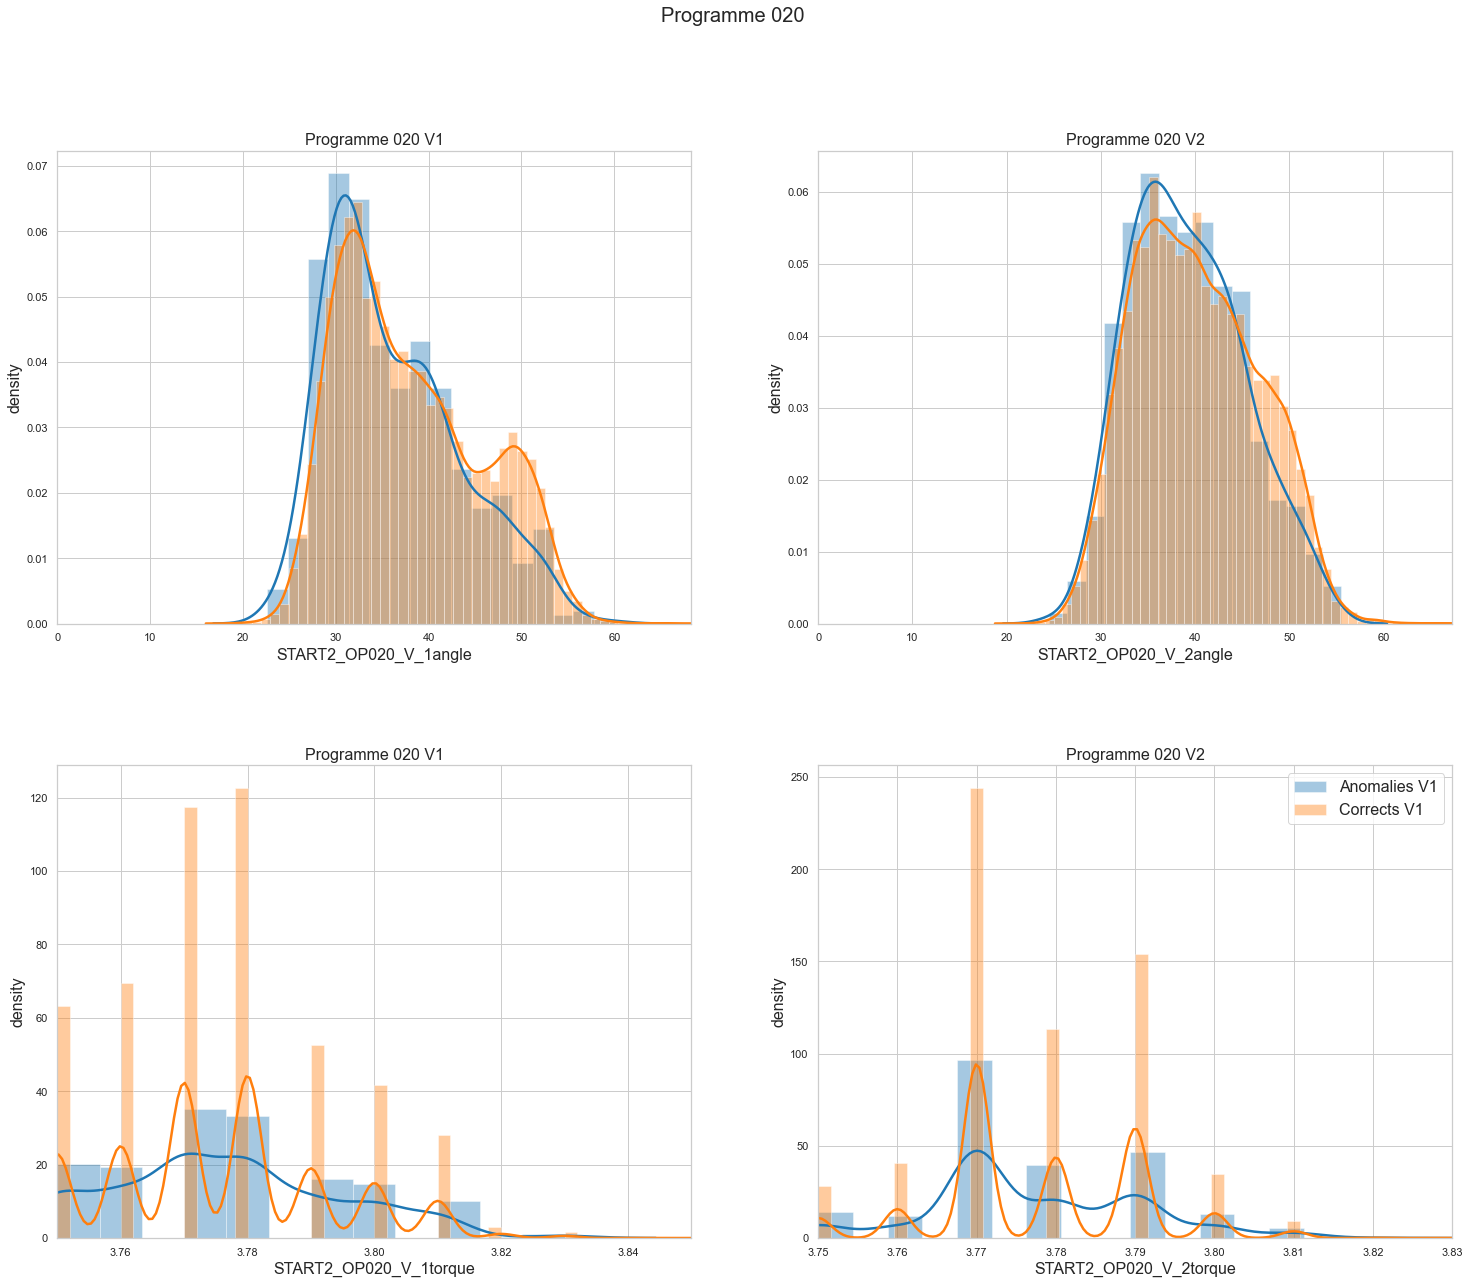

In [13]:
fig,ax = plt.subplots(2,2,figsize=(25, 20))
fig.subplots_adjust(hspace=0.3)  # séparation verticale
fig.suptitle('Programme 020')
plt.xticks()
#Programme V1
ax[0][0].set_title('Programme 020 V1')
ax[0][0].set_xlabel('angle')
ax[0][0].set_ylabel('density')
ax[0][0].set_xlim(0, np.max(xtrain_c['START2_OP020_V_1angle']))
sns.distplot(xtrain_c['START2_OP020_V_1angle'].iloc[anomalies], ax=ax[0][0], label ='Anomalies V1')
sns.distplot(xtrain_c['START2_OP020_V_1angle'].iloc[normals], ax=ax[0][0], label ='Corrects V1')
plt.legend(loc=1,numpoints=1)
ax[1][0].set_title('Programme 020 V1')
ax[1][0].set_xlabel('torque')
ax[1][0].set_ylabel('density')
ax[1][0].set_xlim(np.min(xtrain_c['START2_OP020_V_1torque']), np.max(xtrain_c['START2_OP020_V_1torque']))
sns.distplot(xtrain_c['START2_OP020_V_1torque'].iloc[anomalies], ax=ax[1][0], label ='Anomalies V1')  
sns.distplot(xtrain_c['START2_OP020_V_1torque'].iloc[normals], ax=ax[1][0], label ='Corrects V1')     


#Programme V2
ax[0][1].set_title('Programme 020 V2')
ax[0][1].set_xlabel('angle')
ax[0][1].set_ylabel('density')
ax[0][1].set_xlim(0, np.max(xtrain_c['START2_OP020_V_2angle']))
sns.distplot(xtrain_c['START2_OP020_V_2angle'].iloc[anomalies], ax=ax[0][1], label ='Anomalies V1')
sns.distplot(xtrain_c['START2_OP020_V_2angle'].iloc[normals], ax=ax[0][1], label ='Corrects V1')
plt.legend(loc=1,numpoints=1)
ax[1][1].set_title('Programme 020 V2')
ax[1][1].set_xlabel('torque')
ax[1][1].set_ylabel('density')
ax[1][1].set_xlim(np.min(xtrain_c['START2_OP020_V_2torque']), np.max(xtrain_c['START2_OP020_V_2torque']))
sns.distplot(xtrain_c['START2_OP020_V_2torque'].iloc[anomalies], ax=ax[1][1], label ='Anomalies V1')  
sns.distplot(xtrain_c['START2_OP020_V_2torque'].iloc[normals], ax=ax[1][1], label ='Corrects V1')   

plt.legend(loc=1,numpoints=1)
plt.show()

#### Distribution angles - couples pour les programme 070 et M8

Le progamme 070 est constitué de deux versions (V1 et V2). En affichant la distributions des angles pour ces deux versions, on réalise que pour chaque version il y a deux distributions:
<li> la version 1 a deux distributions des angles et des couples de serrage correspond a priori à l'activation du "prog1"
<li> la version 2 a deux distributions des angles et des couples de serrage correspond a priori à l'activation du "prog2"   

Cette approche est similaire pour le programme de vissage M8. 
    
J'ai créé une fonction qui sépare les distributions des points sur deux canaux suivant que le programme 1, 2 et M8 soit activé (on) ou pas(off) - [voir utils.ProcessData()] -.
    
J'ai aussi crée des nouvelles features correspondantes à l'energie requise pour serrer chaque élément en multipliant le couple avec la rotation angulaire - [voir utils.ProcessData() et utils.CreateFeatures()] -. J'aurai aussi pu passer avec une fonction polynomiale ou un kernel en préprocessing.

 ##### Distribution angles - couples pour les programme 070 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


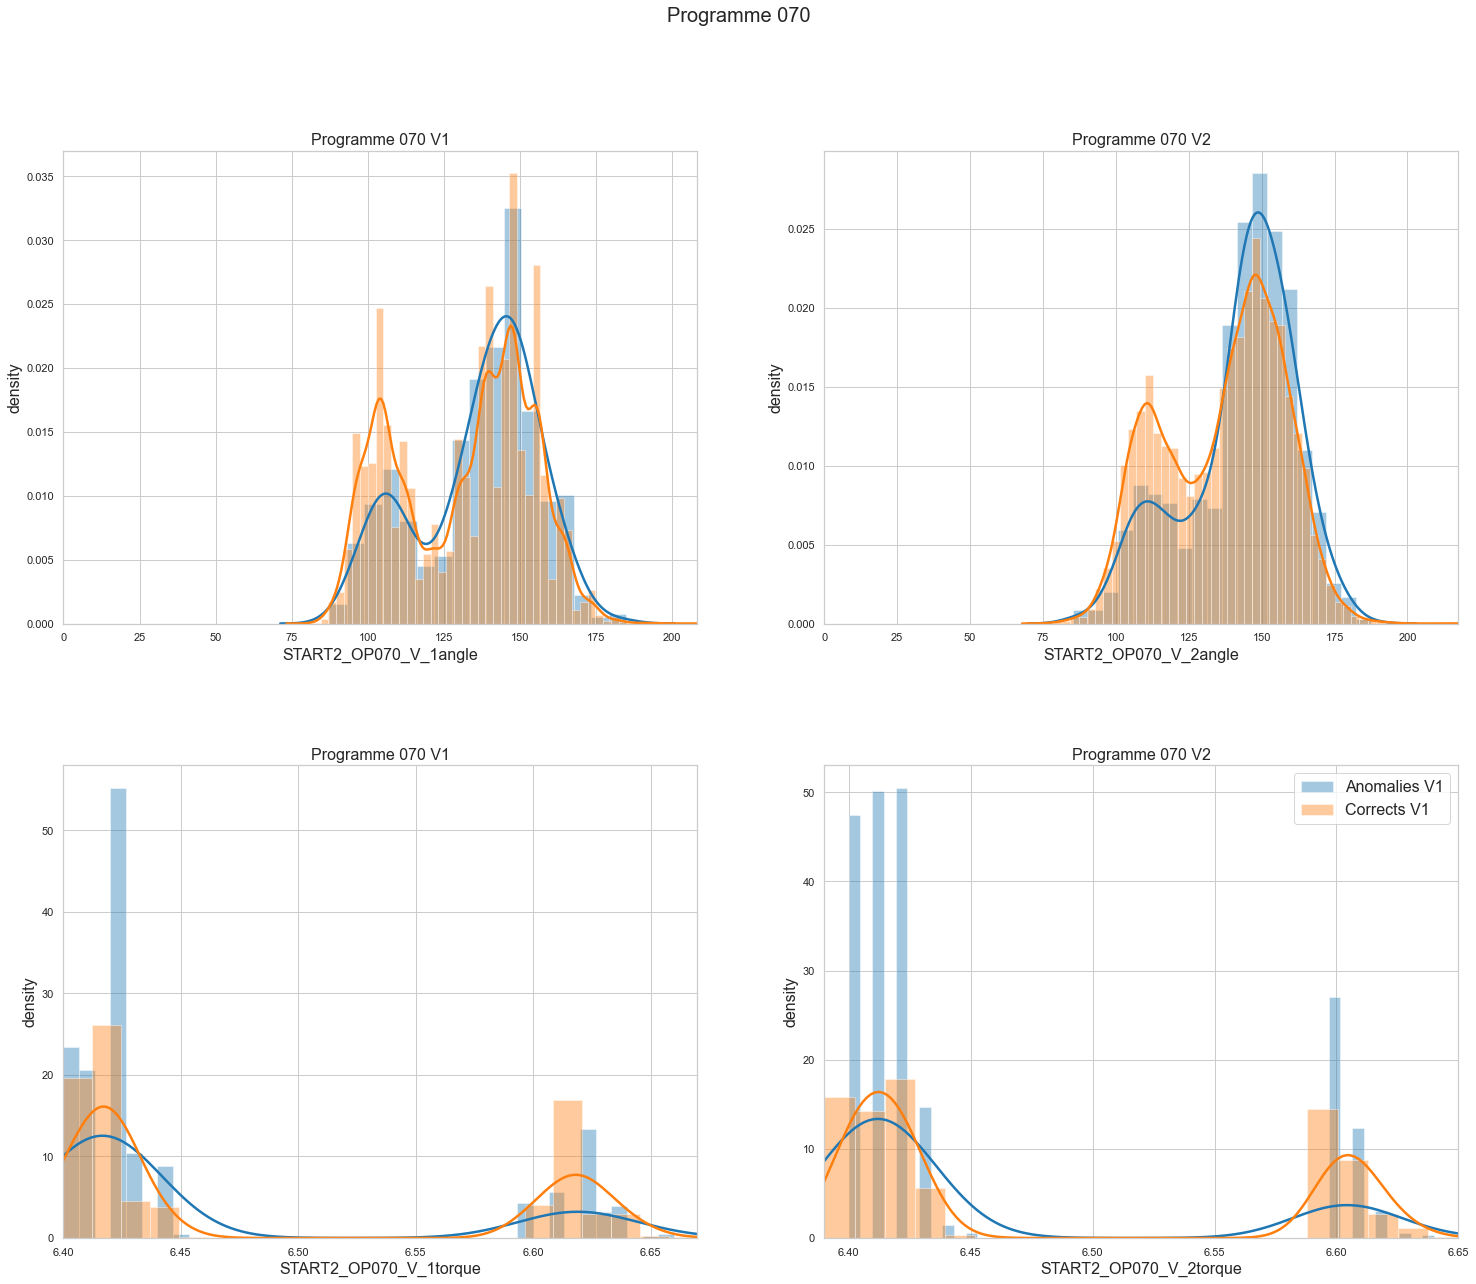

In [14]:
fig,ax = plt.subplots(2,2,figsize=(25, 20))
fig.subplots_adjust(hspace=0.3)  # séparation verticale
fig.suptitle('Programme 070')

#Programme V1
ax[0][0].set_title('Programme 070 V1')
ax[0][0].set_xlabel('angle')
ax[0][0].set_ylabel('density')
ax[0][0].set_xlim(0, np.max(xtrain_c['START2_OP070_V_1angle']))
sns.distplot(xtrain_c['START2_OP070_V_1angle'].iloc[anomalies], ax=ax[0][0], label ='Anomalies V1')
sns.distplot(xtrain_c['START2_OP070_V_1angle'].iloc[normals], ax=ax[0][0], label ='Corrects V1')
plt.legend(loc=1,numpoints=1)
ax[1][0].set_title('Programme 070 V1')
ax[1][0].set_xlabel('torque')
ax[1][0].set_ylabel('density')
ax[1][0].set_xlim(np.min(xtrain_c['START2_OP070_V_1torque']), np.max(xtrain_c['START2_OP070_V_1torque']))
sns.distplot(xtrain_c['START2_OP070_V_1torque'].iloc[anomalies], ax=ax[1][0], label ='Anomalies V1')  
sns.distplot(xtrain_c['START2_OP070_V_1torque'].iloc[normals], ax=ax[1][0], label ='Corrects V1')     


#Programme V2
ax[0][1].set_title('Programme 070 V2')
ax[0][1].set_xlabel('angle')
ax[0][1].set_ylabel('density')
ax[0][1].set_xlim(0, np.max(xtrain_c['START2_OP070_V_2angle']))
sns.distplot(xtrain_c['START2_OP070_V_2angle'].iloc[anomalies], ax=ax[0][1], label ='Anomalies V1')
sns.distplot(xtrain_c['START2_OP070_V_2angle'].iloc[normals], ax=ax[0][1], label ='Corrects V1')
plt.legend(loc=1,numpoints=1)
ax[1][1].set_title('Programme 070 V2')
ax[1][1].set_xlabel('torque')
ax[1][1].set_ylabel('density')
ax[1][1].set_xlim(np.min(xtrain_c['START2_OP070_V_2torque']), np.max(xtrain_c['START2_OP070_V_2torque']))
sns.distplot(xtrain_c['START2_OP070_V_2torque'].iloc[anomalies], ax=ax[1][1], label ='Anomalies V1')  
sns.distplot(xtrain_c['START2_OP070_V_2torque'].iloc[normals], ax=ax[1][1], label ='Corrects V1') 

plt.legend(loc=1,numpoints=1)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


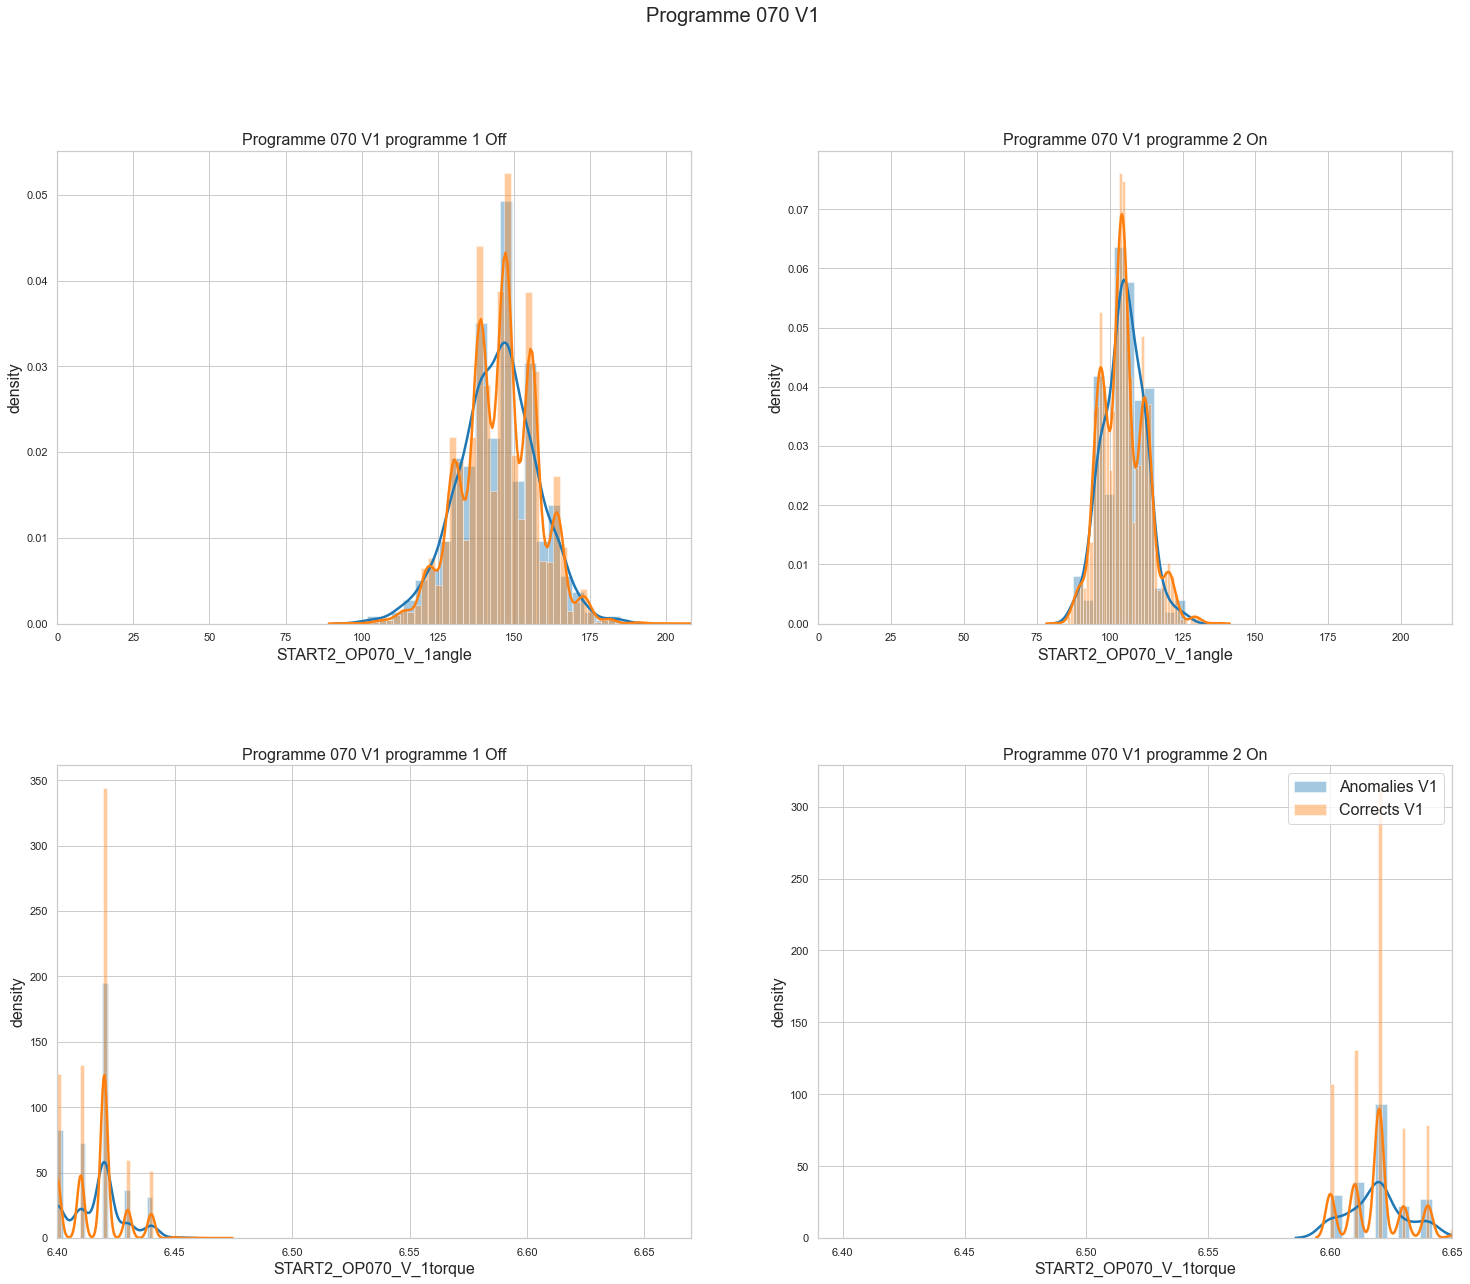

In [15]:
fig,ax = plt.subplots(2,2,figsize=(25, 20))
fig.subplots_adjust(hspace=0.3)  # séparation verticale
fig.suptitle('Programme 070 V1')

#Programme V1
ax[0][0].set_title('Programme 070 V1 programme 1 Off')
ax[0][0].set_xlabel('angle')
ax[0][0].set_ylabel('density')
ax[0][0].set_xlim(0, np.max(xtrain_c['START2_OP070_V_1angle']))
sns.distplot(xtrain_c['START2_OP070_V_1angle'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_1prog']==0], ax=ax[0][0], label ='Anomalies V1')
sns.distplot(xtrain_c['START2_OP070_V_1angle'].iloc[normals].loc[xtrain_c['START2_OP070_V_1prog']==0], ax=ax[0][0], label ='Corrects V1')
plt.legend(loc=1,numpoints=1)
ax[1][0].set_title('Programme 070 V1 programme 1 Off')
ax[1][0].set_xlabel('torque')
ax[1][0].set_ylabel('density')
ax[1][0].set_xlim(np.min(xtrain_c['START2_OP070_V_1torque']), np.max(xtrain_c['START2_OP070_V_1torque']))
sns.distplot(xtrain_c['START2_OP070_V_1torque'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_1prog']==0], ax=ax[1][0], label ='Anomalies V1')  
sns.distplot(xtrain_c['START2_OP070_V_1torque'].iloc[normals].loc[xtrain_c['START2_OP070_V_1prog']==0], ax=ax[1][0], label ='Corrects V1')     


#Programme V1
ax[0][1].set_title('Programme 070 V1 programme 2 On')
ax[0][1].set_xlabel('angle')
ax[0][1].set_ylabel('density')
ax[0][1].set_xlim(0, np.max(xtrain_c['START2_OP070_V_2angle']))
sns.distplot(xtrain_c['START2_OP070_V_1angle'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_1prog']==1], ax=ax[0][1], label ='Anomalies V1')
sns.distplot(xtrain_c['START2_OP070_V_1angle'].iloc[normals].loc[xtrain_c['START2_OP070_V_1prog']==1], ax=ax[0][1], label ='Corrects V1')
plt.legend(loc=1,numpoints=1)
ax[1][1].set_title('Programme 070 V1 programme 2 On')
ax[1][1].set_xlabel('torque')
ax[1][1].set_ylabel('density')
ax[1][1].set_xlim(np.min(xtrain_c['START2_OP070_V_2torque']), np.max(xtrain_c['START2_OP070_V_2torque']))
sns.distplot(xtrain_c['START2_OP070_V_1torque'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_1prog']==1], ax=ax[1][1], label ='Anomalies V1')  
sns.distplot(xtrain_c['START2_OP070_V_1torque'].iloc[normals].loc[xtrain_c['START2_OP070_V_1prog']==1], ax=ax[1][1], label ='Corrects V1')     


plt.legend(loc=1,numpoints=1)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


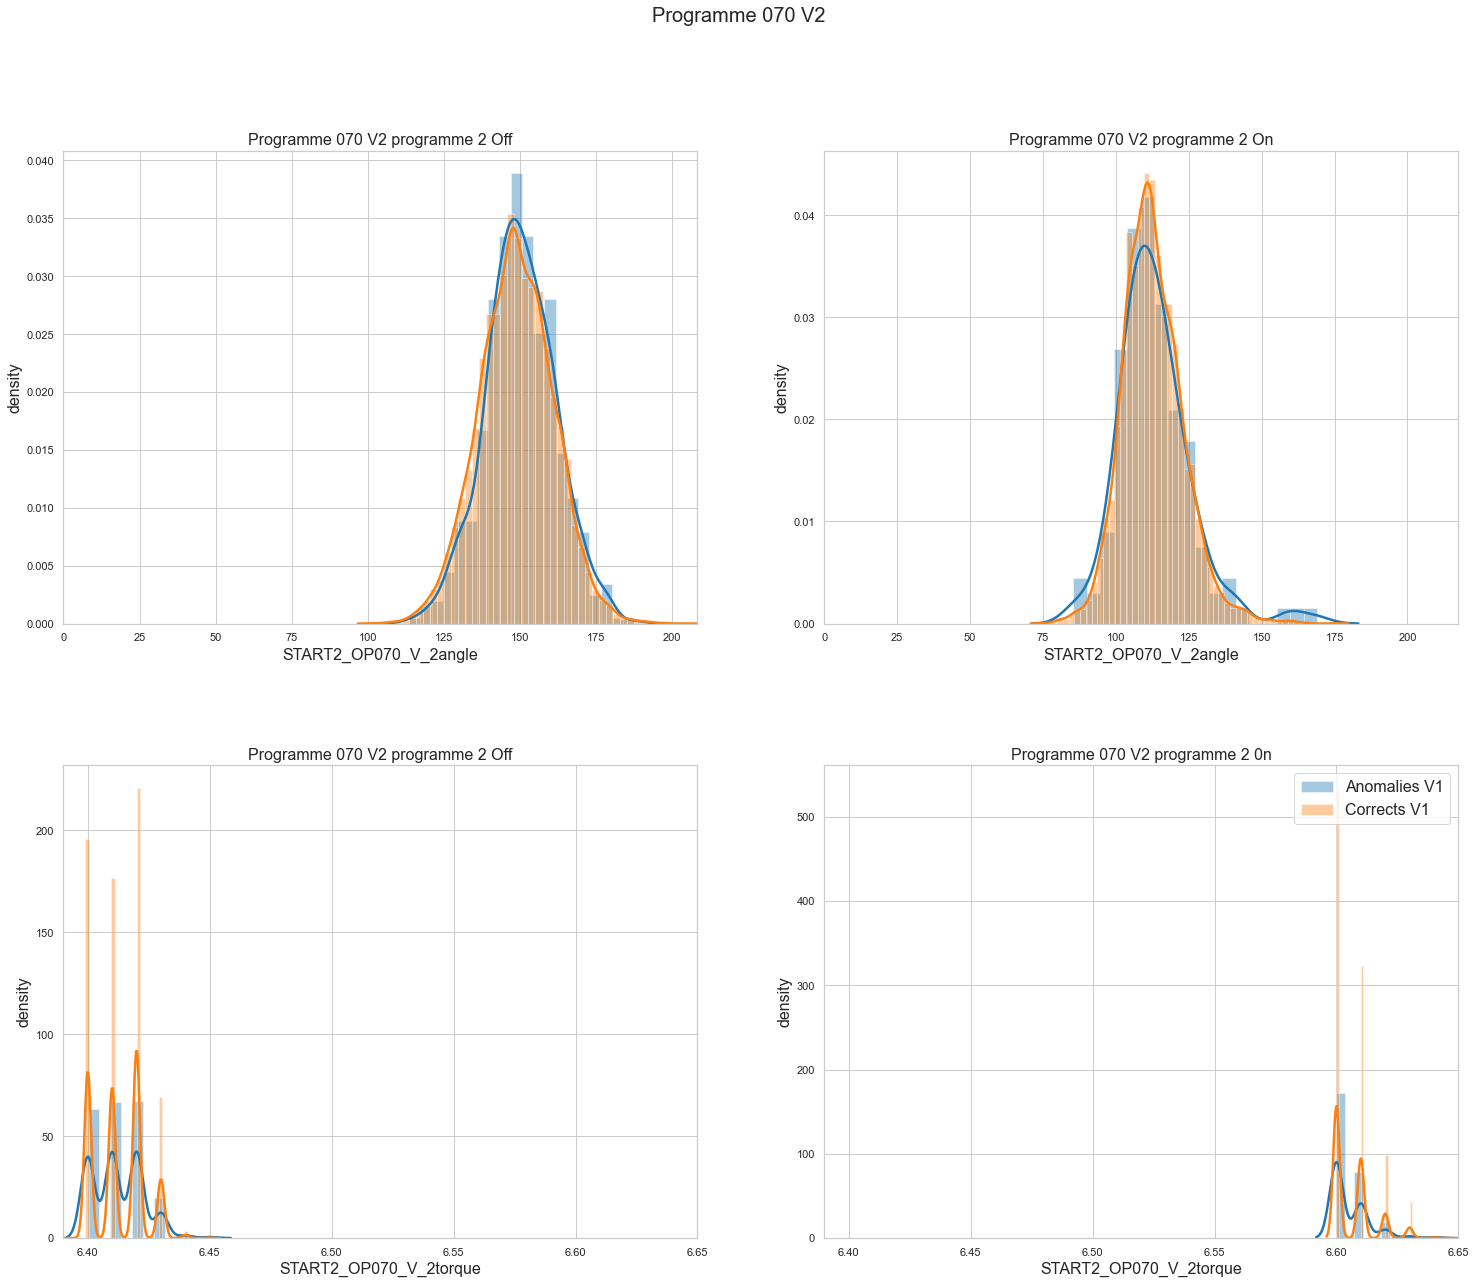

In [16]:
fig,ax = plt.subplots(2,2,figsize=(25, 20))
fig.subplots_adjust(hspace=0.3)  # séparation verticale
fig.suptitle('Programme 070 V2')

#Programme V1
ax[0][0].set_title('Programme 070 V2 programme 2 Off')
ax[0][0].set_xlabel('angle')
ax[0][0].set_ylabel('density')
ax[0][0].set_xlim(0, np.max(xtrain_c['START2_OP070_V_1angle']))
sns.distplot(xtrain_c['START2_OP070_V_2angle'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_2prog']==0], ax=ax[0][0], label ='Anomalies V1')
sns.distplot(xtrain_c['START2_OP070_V_2angle'].iloc[normals].loc[xtrain_c['START2_OP070_V_2prog']==0], ax=ax[0][0], label ='Corrects V1')
plt.legend(loc=1,numpoints=1)
ax[1][0].set_title('Programme 070 V2 programme 2 Off')
ax[1][0].set_xlabel('torque')
ax[1][0].set_ylabel('density')
ax[1][0].set_xlim(np.min(xtrain_c['START2_OP070_V_2torque']), np.max(xtrain_c['START2_OP070_V_2torque']))
sns.distplot(xtrain_c['START2_OP070_V_2torque'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_2prog']==0], ax=ax[1][0], label ='Anomalies V1')  
sns.distplot(xtrain_c['START2_OP070_V_2torque'].iloc[normals].loc[xtrain_c['START2_OP070_V_2prog']==0], ax=ax[1][0], label ='Corrects V1')     


#Programme V1
ax[0][1].set_title('Programme 070 V2 programme 2 On')
ax[0][1].set_xlabel('angle')
ax[0][1].set_ylabel('density')
ax[0][1].set_xlim(0, np.max(xtrain_c['START2_OP070_V_2angle']))
sns.distplot(xtrain_c['START2_OP070_V_2angle'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_2prog']==1], ax=ax[0][1], label ='Anomalies V1')
sns.distplot(xtrain_c['START2_OP070_V_2angle'].iloc[normals].loc[xtrain_c['START2_OP070_V_2prog']==1], ax=ax[0][1], label ='Corrects V1')
plt.legend(loc=1,numpoints=1)
ax[1][1].set_title('Programme 070 V2 programme 2 0n')
ax[1][1].set_xlabel('torque')
ax[1][1].set_ylabel('density')
ax[1][1].set_xlim(np.min(xtrain_c['START2_OP070_V_2torque']), np.max(xtrain_c['START2_OP070_V_2torque']))
sns.distplot(xtrain_c['START2_OP070_V_2torque'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_2prog']==1], ax=ax[1][1], label ='Anomalies V1')  
sns.distplot(xtrain_c['START2_OP070_V_2torque'].iloc[normals].loc[xtrain_c['START2_OP070_V_2prog']==1], ax=ax[1][1], label ='Corrects V1')     


plt.legend(loc=1,numpoints=1)
plt.show()

##### Distribution angles - couples pour le programme M8

No handles with labels found to put in legend.
No handles with labels found to put in legend.


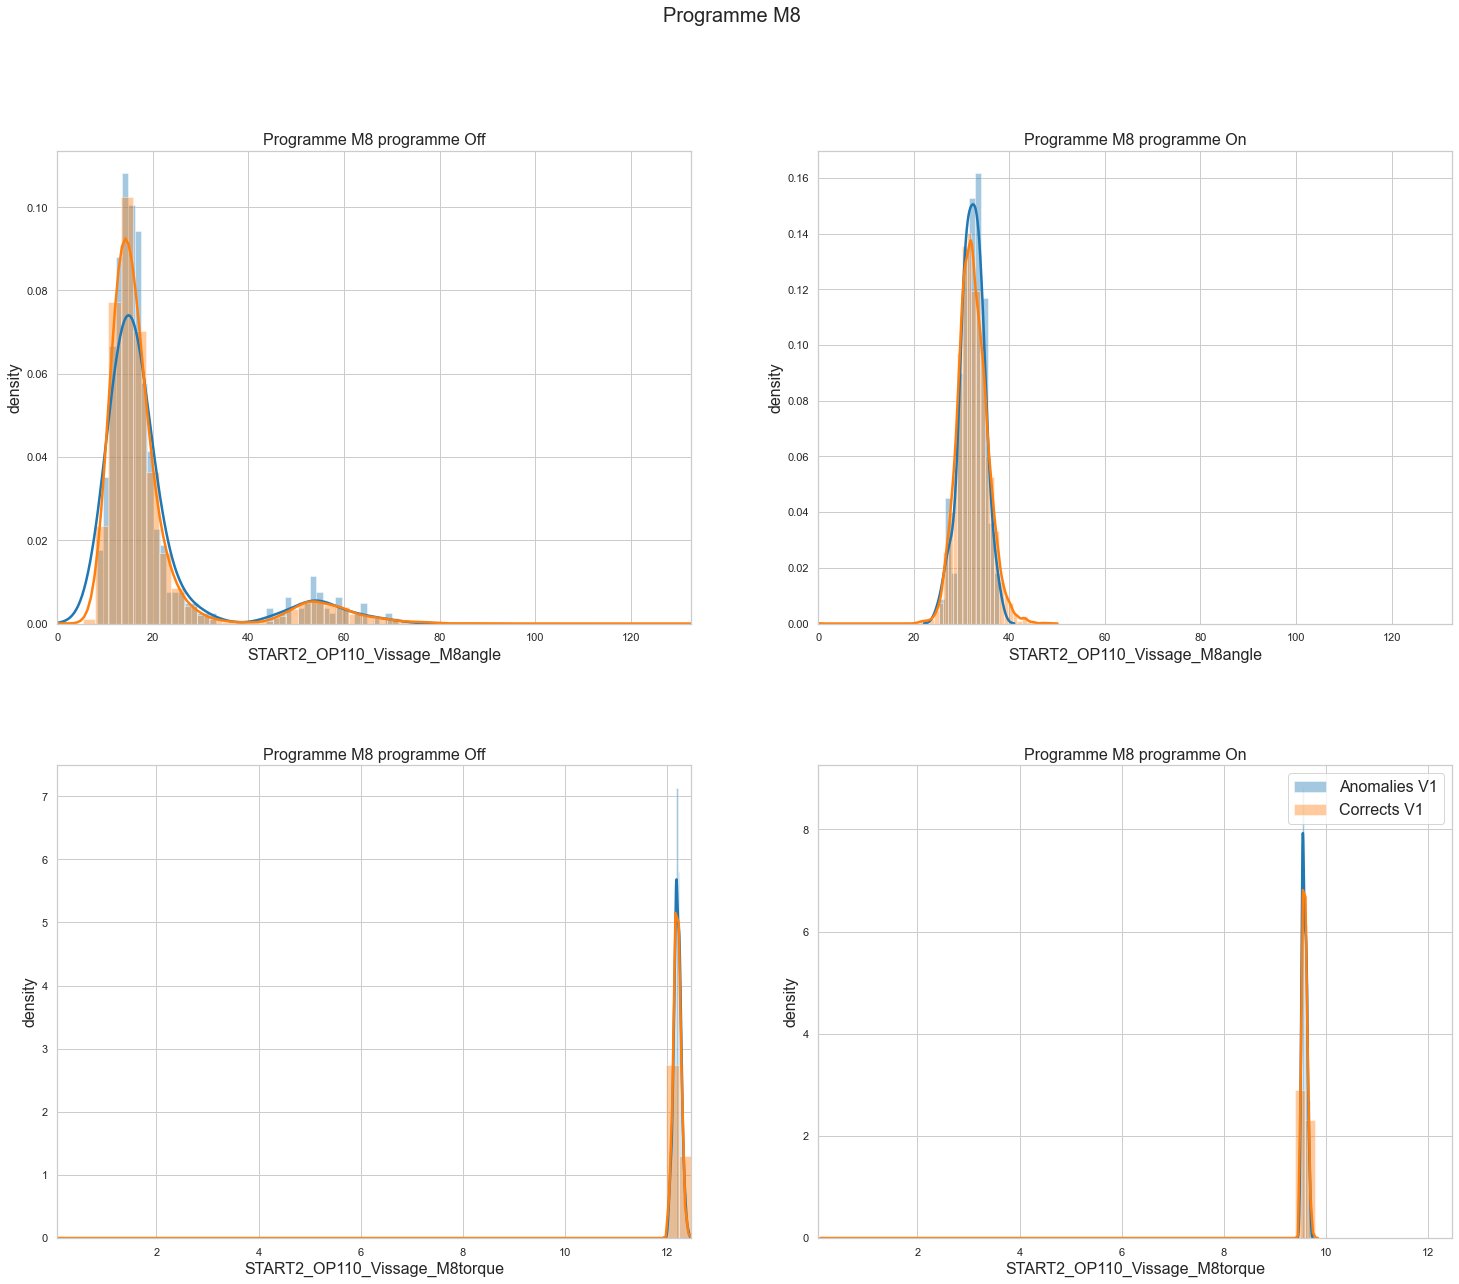

In [17]:
fig,ax = plt.subplots(2,2,figsize=(25, 20))
fig.subplots_adjust(hspace=0.3)  # séparation verticale
fig.suptitle('Programme M8')

#Programme V1
ax[0][0].set_title('Programme M8 programme Off')
ax[0][0].set_xlabel('angle')
ax[0][0].set_ylabel('density')
ax[0][0].set_xlim(0, np.max(xtrain_c['START2_OP110_Vissage_M8angle']))
sns.distplot(xtrain_c['START2_OP110_Vissage_M8angle'].iloc[anomalies].loc[xtrain_c['START2_OP110_Vissage_M8prog']==0], ax=ax[0][0], label ='Anomalies V1')
sns.distplot(xtrain_c['START2_OP110_Vissage_M8angle'].iloc[normals].loc[xtrain_c['START2_OP110_Vissage_M8prog']==0], ax=ax[0][0], label ='Corrects V1')
plt.legend(loc=1,numpoints=1)
ax[1][0].set_title('Programme M8 programme Off')
ax[1][0].set_xlabel('torque')
ax[1][0].set_ylabel('density')
ax[1][0].set_xlim(np.min(xtrain_c['START2_OP110_Vissage_M8torque']), np.max(xtrain_c['START2_OP110_Vissage_M8torque']))
sns.distplot(xtrain_c['START2_OP110_Vissage_M8torque'].iloc[anomalies].loc[xtrain_c['START2_OP110_Vissage_M8prog']==0], ax=ax[1][0], label ='Anomalies V1')  
sns.distplot(xtrain_c['START2_OP110_Vissage_M8torque'].iloc[normals].loc[xtrain_c['START2_OP110_Vissage_M8prog']==0], ax=ax[1][0], label ='Corrects V1')     


#Programme V1
ax[0][1].set_title('Programme M8 programme On')
ax[0][1].set_xlabel('angle')
ax[0][1].set_ylabel('density')
ax[0][1].set_xlim(0, np.max(xtrain_c['START2_OP110_Vissage_M8angle']))
sns.distplot(xtrain_c['START2_OP110_Vissage_M8angle'].iloc[anomalies].loc[xtrain_c['START2_OP110_Vissage_M8prog']==1], ax=ax[0][1], label ='Anomalies V1')
sns.distplot(xtrain_c['START2_OP110_Vissage_M8angle'].iloc[normals].loc[xtrain_c['START2_OP110_Vissage_M8prog']==1], ax=ax[0][1], label ='Corrects V1')
plt.legend(loc=1,numpoints=1)
ax[1][1].set_title('Programme M8 programme On')
ax[1][1].set_xlabel('torque')
ax[1][1].set_ylabel('density')
ax[1][1].set_xlim(np.min(xtrain_c['START2_OP110_Vissage_M8torque']), np.max(xtrain_c['START2_OP110_Vissage_M8torque']))
sns.distplot(xtrain_c['START2_OP110_Vissage_M8torque'].iloc[anomalies].loc[xtrain_c['START2_OP110_Vissage_M8prog']==1], ax=ax[1][1], label ='Anomalies V1')  
sns.distplot(xtrain_c['START2_OP110_Vissage_M8torque'].iloc[normals].loc[xtrain_c['START2_OP110_Vissage_M8prog']==1], ax=ax[1][1], label ='Corrects V1')     


plt.legend(loc=1,numpoints=1)
plt.show()

##### Puissances de serrage (ex)

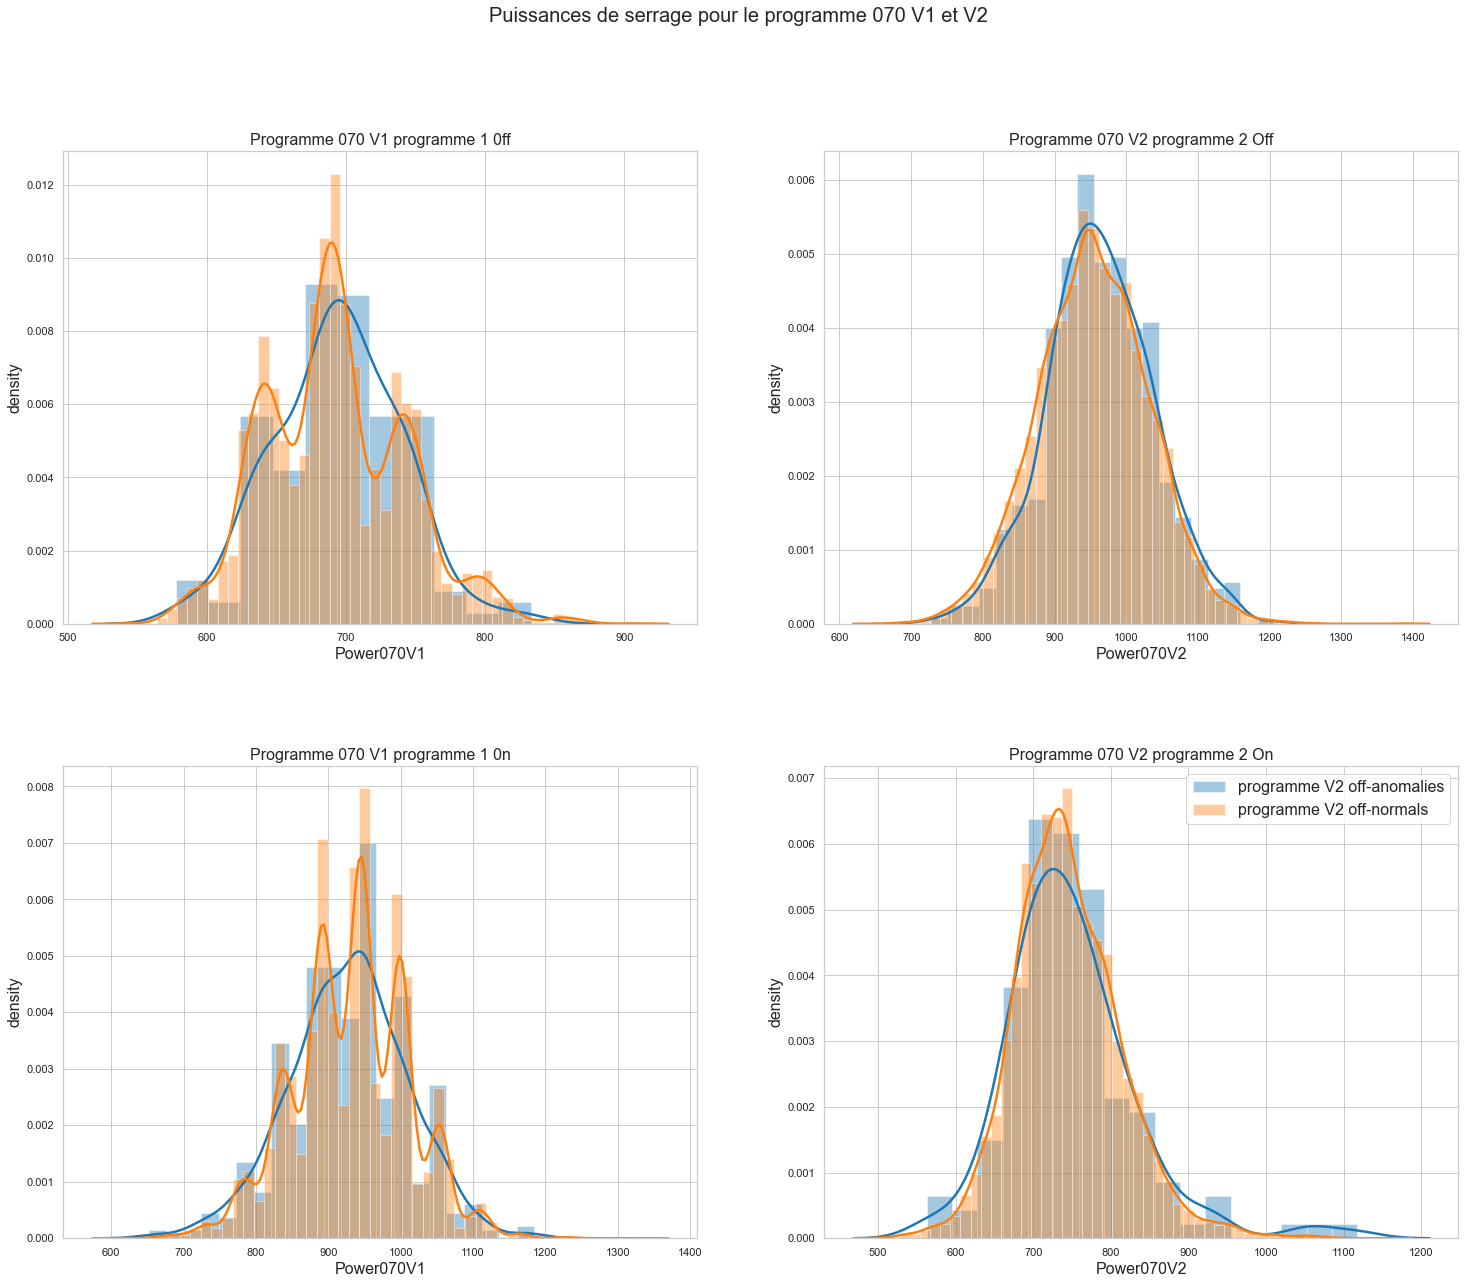

In [18]:
fig,ax = plt.subplots(2,2,figsize=(25, 20))
fig.subplots_adjust(hspace=0.3)  # séparation verticale
fig.suptitle('Puissances de serrage pour le programme 070 V1 et V2')

xtrain_c['Power070V1']=xtrain_c['START2_OP070_V_1angle']*xtrain_c['START2_OP070_V_1torque']
xtrain_c['Power070V2']=xtrain_c['START2_OP070_V_2angle']*xtrain_c['START2_OP070_V_2torque']

ax[0][0].set_title('Programme 070 V1 programme 1 0ff')
ax[0][0].set_xlabel('angle')
ax[0][0].set_ylabel('density')
sns.distplot(xtrain_c['Power070V1'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_1prog']==1],ax=ax[0][0],label='programme V1 on-anomalies')
sns.distplot(xtrain_c['Power070V1'].iloc[normals].loc[xtrain_c['START2_OP070_V_1prog']==1],ax=ax[0][0],label='programme V1 on-normals')

ax[1][0].set_title('Programme 070 V1 programme 1 0n')
ax[1][0].set_xlabel('angle')
ax[1][0].set_ylabel('density')
sns.distplot(xtrain_c['Power070V1'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_1prog']==0],ax=ax[1][0],label='programme V1 off-anomalies')
sns.distplot(xtrain_c['Power070V1'].iloc[normals].loc[xtrain_c['START2_OP070_V_1prog']==0],ax=ax[1][0],label='programme V1 off-normals')

ax[0][1].set_title('Programme 070 V2 programme 2 Off')
ax[0][1].set_xlabel('angle')
ax[0][1].set_ylabel('density')
sns.distplot(xtrain_c['Power070V2'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_2prog']==0],ax=ax[0][1],label='programme V2 off-anomalies')
sns.distplot(xtrain_c['Power070V2'].iloc[normals].loc[xtrain_c['START2_OP070_V_2prog']==0],ax=ax[0][1],label='programme V2 off-normals')

ax[1][1].set_title('Programme 070 V2 programme 2 On')
ax[1][1].set_xlabel('angle')
ax[1][1].set_ylabel('density')
sns.distplot(xtrain_c['Power070V2'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_2prog']==1],ax=ax[1][1],label='programme V2 off-anomalies')
sns.distplot(xtrain_c['Power070V2'].iloc[normals].loc[xtrain_c['START2_OP070_V_2prog']==1],ax=ax[1][1],label='programme V2 off-normals')

plt.legend()

#### Distribution des puissances électriques

On constate que l'intensité et la puissances électrique consommée sont effectivemment proportionnelles aux énergies de serrage. De facto, il y a donc deux distributions d'intensité et de puissance électrique suiavnt que les programmes 1,2 et M8 soient activés ou pas.

La distribution des anomalies est clairement différente et potentiellement discriminate lorsque les programes 1,2 ou M8 sont activés.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


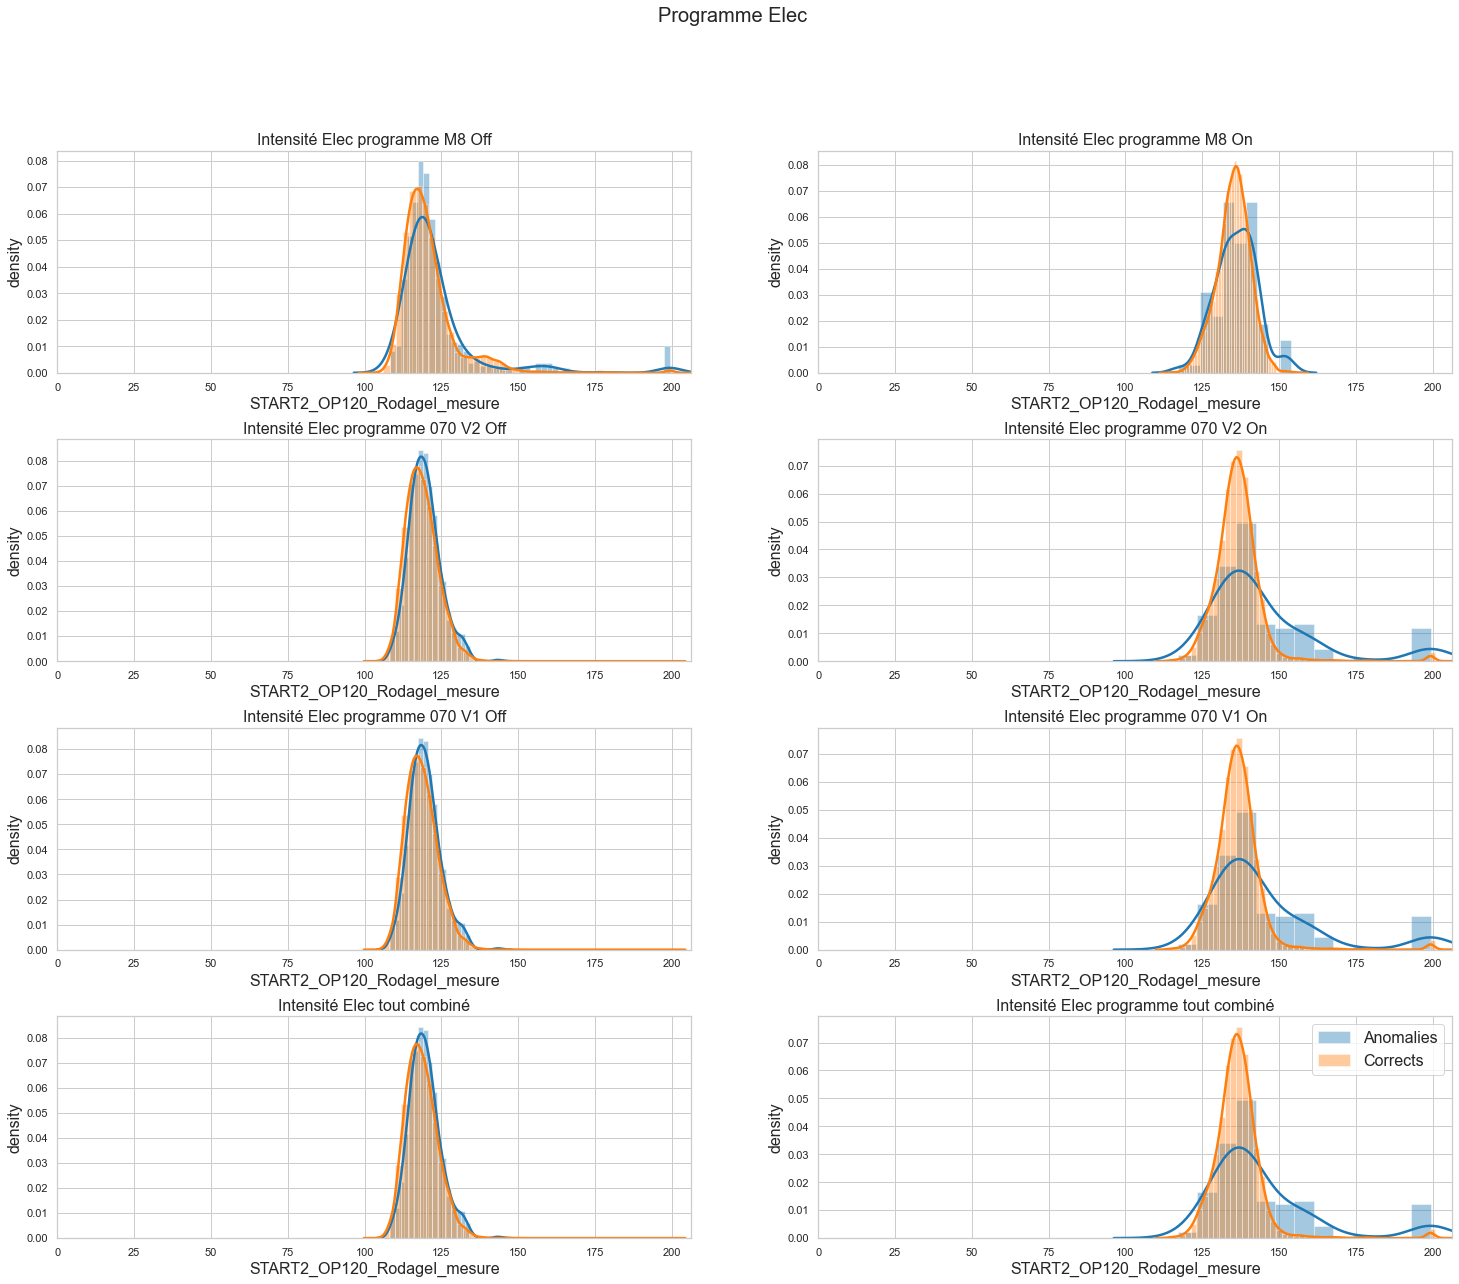

In [19]:
fig,ax = plt.subplots(4,2,figsize=(25, 20))
fig.subplots_adjust(hspace=0.3)  # séparation verticale
fig.suptitle('Programme Elec')
actif =(xtrain_c['START2_OP070_V_1prog']==1) | (xtrain_c['START2_OP070_V_2prog']==1) | (xtrain_c['START2_OP110_Vissage_M8prog']==1)
passif =(xtrain_c['START2_OP070_V_1prog']==0) | (xtrain_c['START2_OP070_V_2prog']==0)| (xtrain_c['START2_OP110_Vissage_M8prog']==0)

#Programme V1
ax[0][0].set_title('Intensité Elec programme M8 Off')
ax[0][0].set_ylabel('density')
ax[0][0].set_xlim(0, np.max(xtrain_c['START2_OP120_RodageI_mesure']))
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[anomalies].loc[xtrain_c['START2_OP110_Vissage_M8prog']==0], ax=ax[0][0], label ='Anomalies')
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[normals].loc[xtrain_c['START2_OP110_Vissage_M8prog']==0], ax=ax[0][0], label ='Corrects')
plt.legend(loc=1,numpoints=1)
ax[1][0].set_title('Intensité Elec programme 070 V2 Off')
ax[1][0].set_ylabel('density')
ax[1][0].set_xlim(0, np.max(xtrain_c['START2_OP120_RodageI_mesure']))
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_2prog']==0], ax=ax[1][0], label ='Anomalies')
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[normals].loc[xtrain_c['START2_OP070_V_2prog']==0], ax=ax[1][0], label ='Corrects')  
ax[2][0].set_title('Intensité Elec programme 070 V1 Off')
ax[2][0].set_ylabel('density')
ax[2][0].set_xlim(0, np.max(xtrain_c['START2_OP120_RodageI_mesure']))
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_1prog']==0], ax=ax[2][0], label ='Anomalies')
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[normals].loc[xtrain_c['START2_OP070_V_1prog']==0], ax=ax[2][0], label ='Corrects')
ax[3][0].set_title('Intensité Elec tout combiné')
ax[3][0].set_ylabel('density')
ax[3][0].set_xlim(0, np.max(xtrain_c['START2_OP120_RodageI_mesure']))
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[anomalies].loc[~actif], ax=ax[3][0], label ='Anomalies')
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[normals].loc[~actif], ax=ax[3][0], label ='Corrects')



#Programme V1
ax[0][1].set_title('Intensité Elec programme M8 On')
ax[0][1].set_ylabel('density')
ax[0][1].set_xlim(0, np.max(xtrain_c['START2_OP120_RodageI_mesure']))
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[anomalies].loc[xtrain_c['START2_OP110_Vissage_M8prog']==1], ax=ax[0][1], label ='Anomalies')
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[normals].loc[xtrain_c['START2_OP110_Vissage_M8prog']==1], ax=ax[0][1], label ='Corrects')
plt.legend(loc=1,numpoints=1)
ax[1][1].set_title('Intensité Elec programme 070 V2 On')
ax[1][1].set_ylabel('density')
ax[1][1].set_xlim(0, np.max(xtrain_c['START2_OP120_RodageI_mesure']))
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_2prog']==1], ax=ax[1][1], label ='Anomalies')
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[normals].loc[xtrain_c['START2_OP070_V_2prog']==1], ax=ax[1][1], label ='Corrects')  
ax[2][1].set_title('Intensité Elec programme 070 V1 On')
ax[2][1].set_ylabel('density')
ax[2][1].set_xlim(0, np.max(xtrain_c['START2_OP120_RodageI_mesure']))
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[anomalies].loc[xtrain_c['START2_OP070_V_1prog']==1], ax=ax[2][1], label ='Anomalies')
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[normals].loc[xtrain_c['START2_OP070_V_1prog']==1], ax=ax[2][1], label ='Corrects')
ax[3][1].set_title('Intensité Elec programme tout combiné')
ax[3][1].set_ylabel('density')
ax[3][1].set_xlim(0, np.max(xtrain_c['START2_OP120_RodageI_mesure']))
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[anomalies].loc[actif], ax=ax[3][1], label ='Anomalies')
sns.distplot(xtrain_c['START2_OP120_RodageI_mesure'].iloc[normals].loc[actif], ax=ax[3][1], label ='Corrects')

plt.legend(loc=1,numpoints=1)
plt.show()

#### Distribution des efforts et courses d'insertion des segments d'arrêts

Les efforts d'insertions des segments d'arrêts semblent aussi conditionnés et distribués en fonction du choix des programmes 1,2 ou M8. 

Je les ai donc répartis sur deux canaux "programme Off en On" suivant que l'un de ses programmes soit activé ou pas - [voir utils.ProcessData() -]. Il aurait peut être été plus judicieux de les séparer suivant chaque programme spécifiquement (1,2 ou M8).

Malgré tout on constate que la distribution des anomalies est différente de celles des cas normaux lorsque les programmes ne sont pas activés. C'est interressant car cela complète les caractéristiques de puissance et d'intensité électrique qui elles sont discriminantes quand les programmes sont "On".



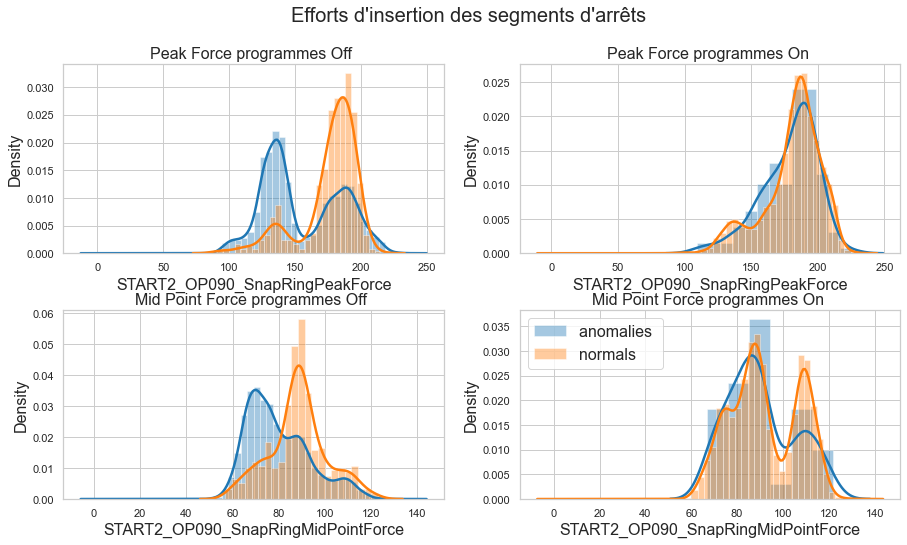

In [20]:
fig,ax = plt.subplots(2,2,figsize=(15, 8))
fig.subplots_adjust(hspace=0.3)  # séparation verticale
fig.suptitle('Efforts d\'insertion des segments d\'arrêts')
ax[0][0].set_title('Peak Force programmes Off ')
ax[0][1].set_title('Peak Force programmes On ')
sns.distplot(xtrain['START2_OP090_SnapRingPeakForce'].iloc[anomalies].loc[actif],label='anomalies actifs',ax=ax[0][1])
sns.distplot(xtrain['START2_OP090_SnapRingPeakForce'].iloc[normals].loc[actif],label='normals actifs',ax=ax[0][1])
sns.distplot(xtrain['START2_OP090_SnapRingPeakForce'].iloc[normals].loc[~actif],label='normals passifs',ax=ax[0][0])
sns.distplot(xtrain['START2_OP090_SnapRingPeakForce'].iloc[anomalies].loc[~actif],label='anomalies passifs',ax=ax[0][0])

ax[1][0].set_title('Mid Point Force programmes Off ')
ax[1][1].set_title('Mid Point Force programmes On ')
sns.distplot(xtrain['START2_OP090_SnapRingMidPointForce'].iloc[anomalies].loc[actif],label='anomalies ',ax=ax[1][1])
sns.distplot(xtrain['START2_OP090_SnapRingMidPointForce'].iloc[normals].loc[actif],label='normals ',ax=ax[1][1])
sns.distplot(xtrain['START2_OP090_SnapRingMidPointForce'].iloc[normals].loc[~actif],label='normals ',ax=ax[1][0])
sns.distplot(xtrain['START2_OP090_SnapRingMidPointForce'].iloc[anomalies].loc[~actif],label='anomalies ',ax=ax[1][0])
plt.legend();

Comme le montre la distribution ci dessous, il semblerait que les caractéristiques suivantes puissent être discriminantes
<li> L'écart entre l'effort final et l'effort initial d'insertion des segments
<li> L'écart entre l'effort final et l'effort intermédiaire d'insertion des segments
<li> L'écart entre l'effort intermédiaire et l'effort initial d'insertion des segments
    
En conséquence j'ai crée des caractéristiques supplémentaires pour ces valeurs - [voir utils.ProcessData() option =True]. En multipliant ces diférences d'effort par la course final j'obtiens un travail en Joule que j'ai ajouté à mes features -[utils.CreateFeatures() option =True] -.

In [21]:
xtraintemp=utils.CreateFeatures(utils.ProcessData(utils.Cleandata(xtrain),option=True),option=True)

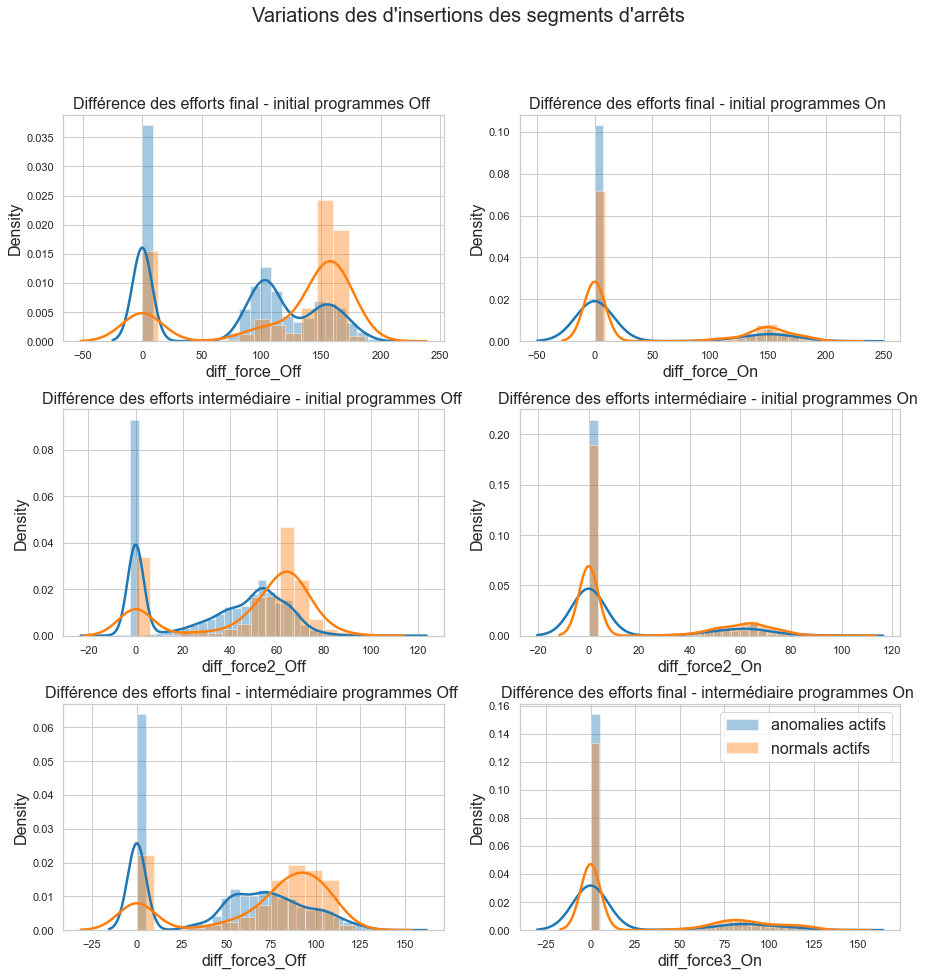

In [22]:
fig,ax = plt.subplots(3,2,figsize=(15, 15))
fig.subplots_adjust(hspace=0.3)  # séparation verticale
fig.suptitle('Variations des d\'insertions des segments d\'arrêts')
ax[0][0].set_title('Différence des efforts final - initial programmes Off ')
ax[0][1].set_title('Différence des efforts final - initial programmes On ')
sns.distplot(xtraintemp['diff_force_On'].iloc[anomalies],label='anomalies actifs',ax=ax[0][1])
sns.distplot(xtraintemp['diff_force_On'].iloc[normals],label='normals actifs',ax=ax[0][1])
sns.distplot(xtraintemp['diff_force_Off'].iloc[normals],label='normals passifs',ax=ax[0][0])
sns.distplot(xtraintemp['diff_force_Off'].iloc[anomalies],label='anomalies passifs',ax=ax[0][0])

ax[1][0].set_title('Différence des efforts intermédiaire - initial programmes Off ')
ax[1][1].set_title('Différence des efforts intermédiaire - initial programmes On ')
sns.distplot(xtraintemp['diff_force2_On'].iloc[anomalies],label='anomalies actifs',ax=ax[1][1])
sns.distplot(xtraintemp['diff_force2_On'].iloc[normals],label='normals actifs',ax=ax[1][1])
sns.distplot(xtraintemp['diff_force2_Off'].iloc[normals],label='normals passifs',ax=ax[1][0])
sns.distplot(xtraintemp['diff_force2_Off'].iloc[anomalies],label='anomalies passifs',ax=ax[1][0])

ax[2][0].set_title('Différence des efforts final - intermédiaire programmes Off ')
ax[2][1].set_title('Différence des efforts final - intermédiaire programmes On ')
sns.distplot(xtraintemp['diff_force3_On'].iloc[anomalies],label='anomalies actifs',ax=ax[2][1])
sns.distplot(xtraintemp['diff_force3_On'].iloc[normals],label='normals actifs',ax=ax[2][1])
sns.distplot(xtraintemp['diff_force3_Off'].iloc[normals],label='normals passifs',ax=ax[2][0])
sns.distplot(xtraintemp['diff_force3_Off'].iloc[anomalies],label='anomalies passifs',ax=ax[2][0])
plt.legend();

#### Données dupliquées

Il y a des données dupliquées dans les datasets train et test. Les identifier comme "duplicated" permet de considérablement améliorer la performance des modèles - [voir utils.Cleandata()] -.

Identifier et labelliser les données dupliquées après avoir mergé les datasets train et set permet au final d'obtenir des performances d'un très bon classifieur. 

In [74]:
result = xtrain.append(xtest)
idx_duplicated=result.duplicated(keep=False)
print('nombres de données dupliquées dans les données:{}'.format(np.sum(idx_duplicated)))

result['duplicated']=idx_duplicated.astype(float)

xtrain_d=result.iloc[:len(xtrain)]
print('nombres de données dupliquées dans les données de train:{}'.format(np.sum(xtrain_d['duplicated']==1)))

xtest_d=result.iloc[len(xtrain):]
print('nombres de données dupliquées dans les données de test:{}'.format(np.sum(xtest_d['duplicated']==1)))

idx_duplicated_train=xtrain.duplicated(keep=False)
print('nombres de données dupliquées dans les données de train uniquement:{}'.format(np.sum(idx_duplicated_train)))

idx_duplicated_test=xtest.duplicated(keep=False)
print('nombres de données dupliquées dans les données de test uniquement:{}'.format(np.sum(idx_duplicated_test)))

nombres de données dupliquées dans les données:2800
nombres de données dupliquées dans les données de train:1374
nombres de données dupliquées dans les données de test:1426
nombres de données dupliquées dans les données de train uniquement:654
nombres de données dupliquées dans les données de test uniquement:706


In [ ]:
anomalies=np.where(ytrain==1)[0]
normals=np.where(ytrain==0)[0]

## Processing

### Nettoyage et création des données de travail

Deux datasets pratiquement identiques sont générés, un destiné aux modèles linéaires, l'autre au autres modèles non linéaires. Cela permert de 
<li> gérer les données catégorielles avec one hot encoding
<li> gerer des données dupliquées dans un certain cas   

In [50]:
Xtrain_lin=utils.CleanLin(utils.Cleandata(xtrain))
Xtrain_nli=utils.Cleandata(xtrain)
Xtest_lin=utils.CleanLin(utils.Cleandata(xtest))
Xtest_nli=utils.Cleandata(xtest_d)

### Préprocessing features
Fonction utils.ProcessDAta():
<li> permet de distribuer les caractéristiques continues sur des canaux "Off" et "On"
<li> permet de créer quelques features

    
Fonction utils.Create.Features():
<li> permet de calculer les puissances (énergies) mécaniques sur des canaux "Off" et "On"
<li> permet de calculer les puissances électriques sur des canaux "Off" et "On"  
    

## Métriques d'évaluation

In [51]:
#classification -imbalanced
from sklearn.metrics import log_loss , roc_auc_score, roc_curve, make_scorer
from sklearn.metrics import f1_score, balanced_accuracy_score, precision_score, recall_score
from imblearn.metrics import sensitivity_score, geometric_mean_score

#clustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score

Etant donné que nos  classes sont déséquilibrées nous allons utiliser des métriques d'évaluation adaptés à ce problème:

<li> Aire sous la courbe 
    ROC: cette métrique sera la métrique principale d'évaluation des modèles.
<li> Recall - Sentitivity  $\frac{TP}{TP+FN}$, cette métrique permettra d'évaluer le nombre de labels positifs qui sont manqués par la prédiction. On assume que nous sommes dans un cas ou il est plus important de détecter les anomalies que de surdétecter les défauts.
<li> Geometric Mean: une métrique couramment utilisée pour des classes déséquilibrées $ \sqrt{Sensitivity*Specificity}$
<li> f1_score : une métrique couramment utilisée pour des classes déséquilibrées $ \frac{2*Precision*Recall}{Precision + Recall}$
<li> Log loss pondéré par le poids des données : $Log Loss = -\frac{1}{N}\sum_{i=1}^n w_i[(y_i \log (p_i) + (1 - y_i) \log (1 - p_i))]$. Pour cette fonction le poids associés à chaque donnée est fonction de sa classe d'appartenance - [voir utils.log_loss_home()].
<li> Balanced accuracy: cette métrique n'a de sens que si la distribution des classes du dataset de train est représentative et généralisable aux données du test set. 

## Baseline

### Modèles linéaires

In [52]:
classifiers_lin = [
    SVC(kernel="linear"),
    SVC(kernel="poly"),
    LogisticRegression()
    ]

In [53]:
#Création des datasets d'apprentissages
X=Xtrain_lin
Y=ytrain
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42) 

#Préprocessing
X_train_cp=utils.ProcessData(X_train,option=True)
X_train=utils.CreateFeatures(X_train_cp,option=True)
X_test_cp=utils.ProcessData(X_test,option=True)
X_test=utils.CreateFeatures(X_test_cp,option=True)

In [54]:
# Baseline Roc score train set
algo = []
scores = []
for clf in classifiers_lin:
    algo.append(clf.__class__.__name__)
    pipe=Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    scores.append(cross_val_score(pipe,X_train,y_train, scoring='roc_auc',cv=5).mean())
warnings.filterwarnings('ignore')
Rocscore_train_lin = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
Rocscore_train_lin

,Score
Algorithm,
SVC,0.698634
SVC,0.800421
LogisticRegression,0.877350


In [55]:
# Baseline Roc score test set
algo = []
scores = []

for clf in classifiers_lin:
    pipe=Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    pipe = pipe.fit(X_train, y_train)
    y_pred = pipe.decision_function(X_test)
    algo.append(clf.__class__.__name__)
    scores.append(roc_auc_score(y_test,y_pred))
warnings.filterwarnings('ignore')
Rocscore_test_lin  = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
Rocscore_test_lin

,Score
Algorithm,
SVC,0.525881
SVC,0.765719
LogisticRegression,0.873669


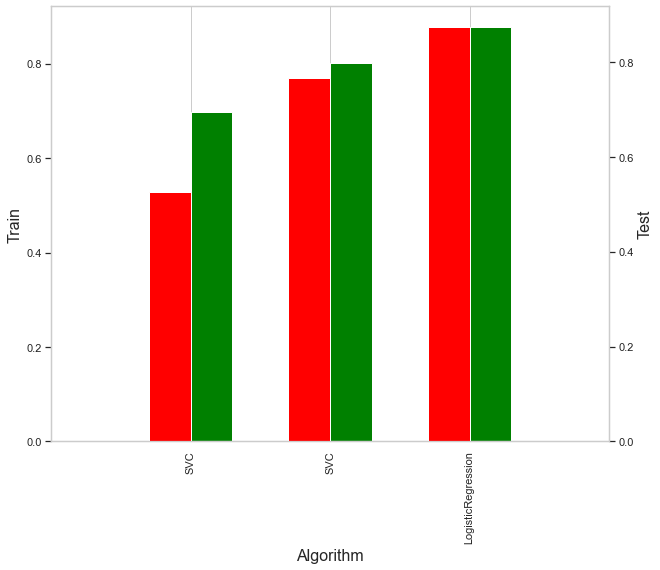

In [56]:
# Bar plot entre train et test set
fig = plt.figure(figsize=(10,8)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = .3

Rocscore_train_lin.Score.plot(kind='bar',color='green',ax=ax,width=width, position=0, label='Train set')
Rocscore_test_lin.Score.plot(kind='bar',color='red', ax=ax2,width = width,position=1, label='Test set')

ax.grid(None, axis='y')
ax2.grid(None)

ax.set_ylabel('Train')
ax2.set_ylabel('Test')

ax.set_xlim(-1,3)
plt.show()

On constate que certains modèles se comportent mieux que d\'autres:
<li> Logistic Regression etonnament généralise bien alors qu'il n'est pas réputé pour les classes déséquilibrées
<li> Les SVM  avec kernel linéaire généralisent très mal dans le cas présent. Soit le problème vient des classes déséquilibrées soit d'une difficulté à trouver une frontière de décision adaptée aux données.

### Modèles non linéaires

In [62]:
#classiffieurs évalués
classifiers_nli = [
    LDA(),
    GaussianNB(),
    QDA(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    xgb.XGBClassifier(objective='binary:logistic',
                          random_state = 42),
    ]

In [63]:
#Création des datasets d'apprentissages
X=Xtrain_nli
Y=ytrain
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42) 

#Préprocessing
X_train_cp=utils.ProcessData(X_train,option=True)
X_train=utils.CreateFeatures(X_train_cp,option=True)
X_test_cp=utils.ProcessData(X_test,option=True)
X_test=utils.CreateFeatures(X_test_cp,option=True)

In [64]:
# Baseline Roc score train set
algo = []
scores = []
for clf in classifiers_nli:
    algo.append(clf.__class__.__name__)
    pipe=Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    scores.append(cross_val_score(pipe,X_train,y_train, scoring='roc_auc',cv=5).mean())
warnings.filterwarnings('ignore')
Rocscore_train_nli = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
Rocscore_train_nli

,Score
Algorithm,
LinearDiscriminantAnalysis,0.877807
GaussianNB,0.786760
QuadraticDiscriminantAnalysis,0.773189
DecisionTreeClassifier,0.560355
RandomForestClassifier,0.875492
BaggingClassifier,0.785313
GradientBoostingClassifier,0.877509
AdaBoostClassifier,0.871616
XGBClassifier,0.869719


In [65]:
# Baseline Roc score test set
algo = []
scores = []

for clf in classifiers_nli:
    pipe=Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    pipe = pipe.fit(X_train, y_train)
    y_pred = pipe.predict_proba(X_test)[:,1]
    algo.append(clf.__class__.__name__)
    scores.append(roc_auc_score(y_test,y_pred))
warnings.filterwarnings('ignore')
Rocscore_test_nli  = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
Rocscore_test_nli

,Score
Algorithm,
LinearDiscriminantAnalysis,0.857939
GaussianNB,0.755677
QuadraticDiscriminantAnalysis,0.682437
DecisionTreeClassifier,0.518149
RandomForestClassifier,0.865524
BaggingClassifier,0.726865
GradientBoostingClassifier,0.876491
AdaBoostClassifier,0.860348
XGBClassifier,0.854087


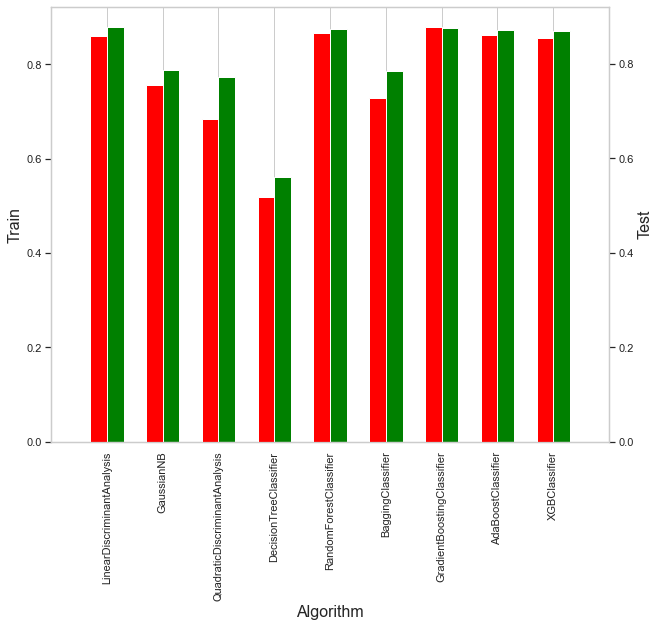

In [66]:
# Bar plot entre train et test set
fig = plt.figure(figsize=(10,8)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = .3

Rocscore_train_nli.Score.plot(kind='bar',color='green',ax=ax,width=width, position=0, label='Train set')
Rocscore_test_nli.Score.plot(kind='bar',color='red', ax=ax2,width = width,position=1, label='Test set')

ax.grid(None, axis='y')
ax2.grid(None)

ax.set_ylabel('Train')
ax2.set_ylabel('Test')

ax.set_xlim(-1,9)
plt.show()

On constate que certains modèles généralisent mieux que d\'autres:
<li> LDA généralise bien car il tient compte des probabiltés a priori de distributions des classes. Il est moins affecté par les données déséquilibrées
<li> Les decision tree ne semblent pas être adapté à ce problème, ni QDA ou Guassian NB en l'état
<li> Des méthodes d'ensemble, RF, Adaboost et les gradientBoosting semblent les plus adaptés

Les méthodes ensemblistes semblent plus adaptées à ce stade et ce sont celles que je vais évaluées

### Choix et évaluation d'un modèle par gridsearch

(22068, 65) (22068, 1)
log loss train:0.05998107115213188
roc auc train: 0.9441275163280463
balanced accuracy train:0.6524031534834676
sensitivity train: 0.30866425992779783
geometric train: 0.5545028834301017
log loss test:0.11029180270689976
roc auc test: 0.8596694312146489
balanced accuracy test:0.5119435962663221
sensitivity test: 0.03597122302158273
geometric test: 0.18851139399480743


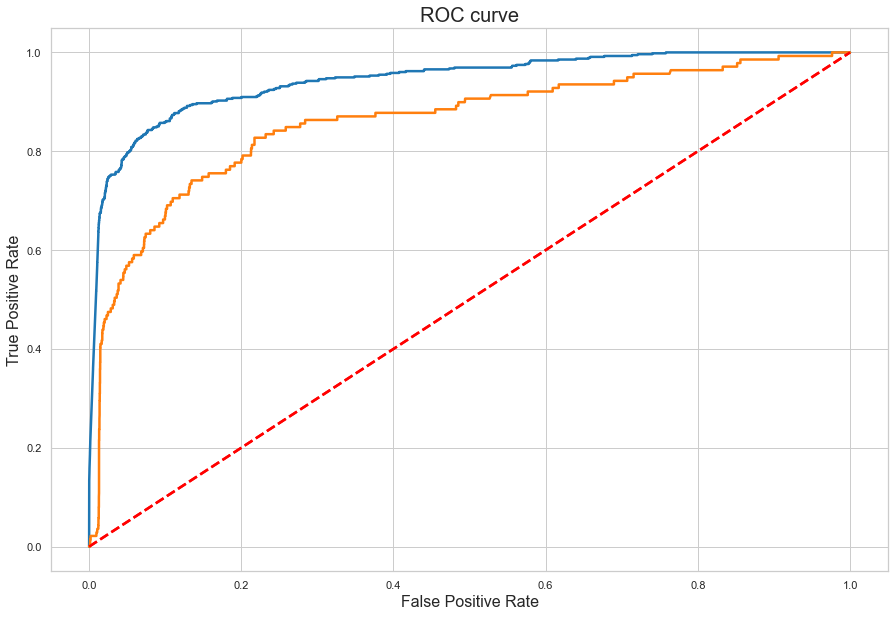

In [70]:
X=Xtrain_nli
xtest_c=Xtest_nli
Y=ytrain
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

X_train_cp=utils.ProcessData(X_train,option=True)
X_train=utils.CreateFeatures(X_train_cp,option=True)
X_test_cp=utils.ProcessData(X_test,option=True)
X_test=utils.CreateFeatures(X_test_cp,option=True)

data=X_train
Y=y_train

params_gene = [{'clf':[RandomForestClassifier(),BaggingClassifier(),
                        GradientBoostingClassifier(),AdaBoostClassifier(),
                        xgb.XGBClassifier(objective='binary:logistic',
                          random_state = 42)],
                 'reduce':[PCA(),'passthrough'],
                 'features':[PowerTransformer( standardize=False),
                             QuantileTransformer(n_quantiles=1000, output_distribution='normal'),'passthrough']}
                 ]


pipe_gene= Pipeline([('scaler',StandardScaler()), ('reduce','passthrough'),('features','passthrough'),('clf', RandomForestClassifier())])


search=GridSearchCV(pipe_gene,
                  param_grid=params_gene,
                  scoring='roc_auc' ,cv= 5, refit='roc_auc_score', return_train_score=True)

search.fit(data,Y.values.ravel())
results = search.cv_results_

print(X_train.shape,y_train.shape)
clf = search.best_estimator_

clf.fit(data, Y.values.ravel(), )

soft=clf.predict_proba(data)[:,1]
false_pos_rate, true_pos_rate, _ = roc_curve(Y,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss train:{}'.format(log_loss(Y,clf.predict_proba(data))))
print('roc auc train: {}'.format(roc_auc_score(Y,soft)))
print('balanced accuracy train:{}'.format(balanced_accuracy_score(Y, clf.predict(data))))
print('sensitivity train: {}'.format(sensitivity_score(Y, clf.predict(X_train))))
print('geometric train: {}'.format(geometric_mean_score(Y, clf.predict(data))))

soft=clf.predict_proba(X_test)[:,1]
false_pos_rate, true_pos_rate, _ = roc_curve(y_test,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss test:{}'.format(log_loss(y_test,clf.predict_proba(X_test))))
print('roc auc test: {}'.format(roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])))
print('balanced accuracy test:{}'.format(balanced_accuracy_score(y_test, clf.predict(X_test))))
print('sensitivity test: {}'.format(sensitivity_score(y_test, clf.predict(X_test))))
print('geometric test: {}'.format(geometric_mean_score(y_test, clf.predict(X_test))))

In [75]:
print('best estimator : {}'.format(search.best_estimator_))
print('best paramters : {}'.format(search.best_params_))
print('best score : {}'.format(search.best_score_))
print('scorer : {}'.format(search.scorer_))

best estimator : Pipeline(steps=[('scaler', StandardScaler()), ('reduce', PCA()),
                ('features', 'passthrough'),
                ('clf', GradientBoostingClassifier())])
best paramters : {'clf': GradientBoostingClassifier(), 'features': 'passthrough', 'reduce': PCA()}
best score : 0.8827376809967917
scorer : make_scorer(roc_auc_score, needs_threshold=True)


Le GradientBoostingClassifier a souvent été le meilleur classifieur avec xGboost. J'ai tenté une sélection de features pour déterminer si les performances pouvaient s'améliorer, ce n'a pas été le cas. Interressant de noter que la feature duplicated obtient 66%.

Feature: duplicated, Score: 0.6659228716111741)
Feature: diff_force2_Off, Score: 0.046112595528237044)
Feature: p4_Off, Score: 0.027478759335996382)
Feature: START2_OP090_SnapRingFinalStroke_Off, Score: 0.025521778085890665)
Feature: p5_Off, Score: 0.02292375930259866)
Feature: START2_OP120_RodageI_mesure_On, Score: 0.013968718249067667)
Feature: START2_OP100_Capuchon_insertionmesure, Score: 0.01250234024433459)
Feature: p3_Off, Score: 0.012341405845664243)
Feature: diff_force_Off, Score: 0.011341323310072891)
Feature: START2_OP090_SnapRingMidPointForce_Off, Score: 0.010428552335735213)


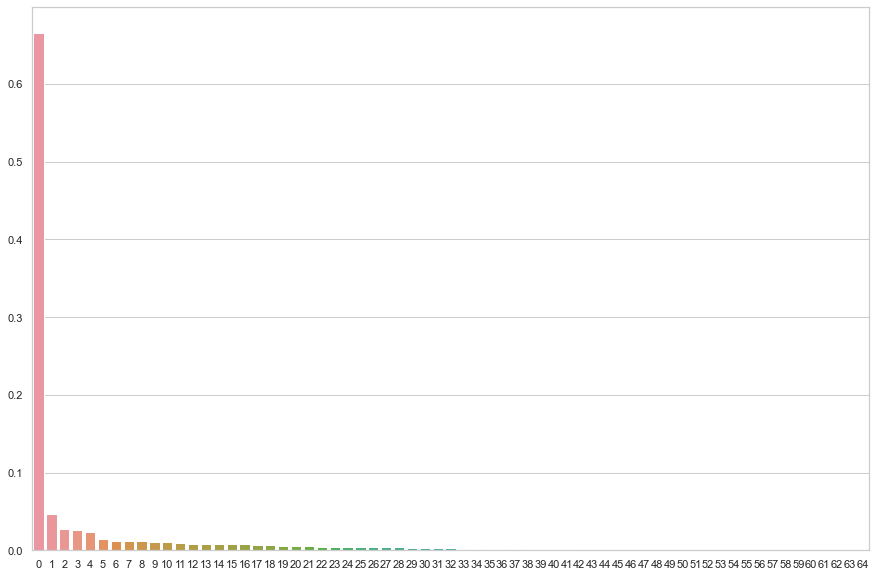

Optimal number of features : 3


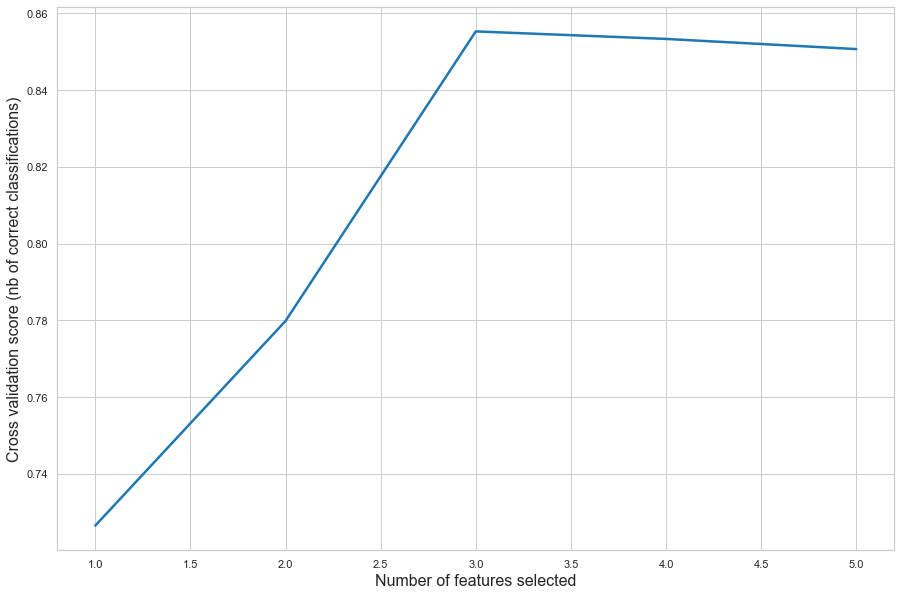

In [100]:
clf=GradientBoostingClassifier()
clf.fit(X_train,y_train)
model = SelectFromModel(clf, prefit=True)
featuresTrain= X_train.loc[:, model.get_support()]
featuresTest = X_test.loc[:, model.get_support()]

importance=clf.feature_importances_
idx=importance.argsort()[::-1]

# Affichage:
for i in range(len(idx[:10])):
    print('Feature: {}, Score: {})'.format(X_train.columns[idx[i]],importance[idx[i]]))
sns.barplot([x for x in range(len(importance))], importance[idx])
plt.show()


lr=LogisticRegression(penalty="l2")
rfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(5), scoring='roc_auc')
rfetrain=rfecv.fit(featuresTrain, y_train)
print('Optimal number of features :', rfecv.n_features_)


# Affichage:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

support=model.get_support()
idx=np.where(support==True)[0]
support[idx] =rfecv.get_support()           

log loss train:1.0508992437320082
roc auc train: 0.8740034803064294
balanced accuracy train:0.6077880946635705
sensitivity train: 0.2184115523465704
geometric train: 0.46668220054768617

log loss home test:1.3174488709049967
roc auc test: 0.8485931834565812
balanced accuracy test:0.5002507753975292
sensitivity test: 0.007194244604316547
geometric test: 0.08453458302961545
f1 test: 0.011363636363636366


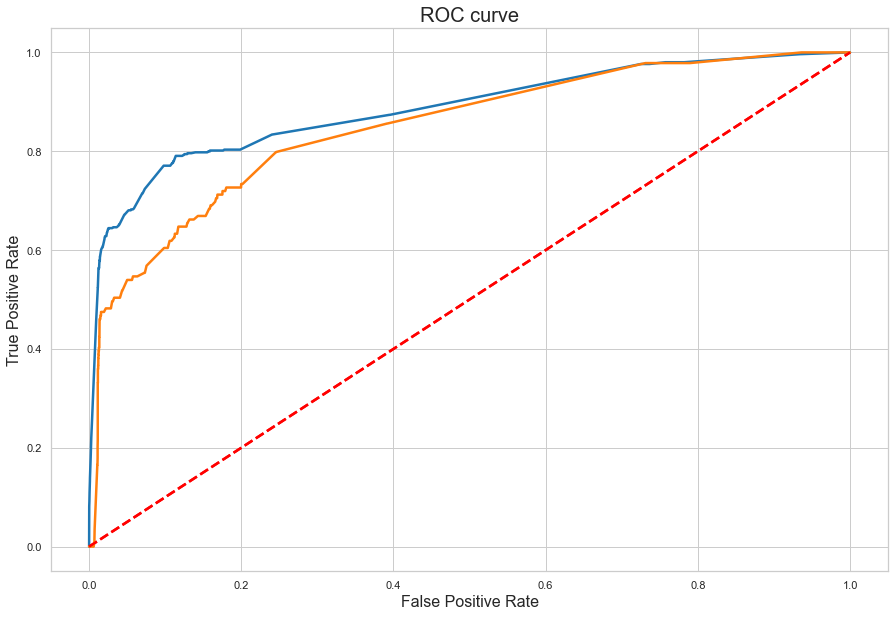

In [101]:
X=Xtrain_nli
Y=ytrain
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42)

X_train_cp=utils.ProcessData(X_train,option=True)
X_train=utils.CreateFeatures(X_train_cp,option=True).loc[:, support]
X_test_cp=utils.ProcessData(X_test,option=True)
X_test=utils.CreateFeatures(X_test_cp,option=True).loc[:, support]

clf=GradientBoostingClassifier()
clf=search.best_estimator_

data=X_train
Y=y_train
clf.fit(data, Y.values.ravel(), )

soft=clf.predict_proba(data)[:,1]

false_pos_rate, true_pos_rate, _ = roc_curve(Y,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss train:{}'.format(utils.log_loss_home(Y,clf.predict_proba(data))))
print('roc auc train: {}'.format(cross_val_score(pipe,X_train,y_train, scoring='roc_auc',cv=5).mean()))
print('balanced accuracy train:{}'.format(balanced_accuracy_score(Y, clf.predict(data))))
print('sensitivity train: {}'.format(sensitivity_score(Y, clf.predict(X_train))))
print('geometric train: {}\n'.format(geometric_mean_score(Y, clf.predict(data))))

soft=clf.predict_proba(X_test)[:,1]
false_pos_rate, true_pos_rate, _ = roc_curve(y_test,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss home test:{}'.format(utils.log_loss_home(y_test,clf.predict_proba(X_test))))
print('roc auc test: {}'.format(roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])))
print('balanced accuracy test:{}'.format(balanced_accuracy_score(y_test, clf.predict(X_test))))
print('sensitivity test: {}'.format(sensitivity_score(y_test, clf.predict(X_test))))
print('geometric test: {}'.format(geometric_mean_score(y_test, clf.predict(X_test))))
print('f1 test: {}'.format(f1_score(y_test, clf.predict(X_test))))                                                                

## Approche "Cost sensitive" via sklearn 

Une manière de lutter contre l'impact des données déséquilibrées consiste à modifier les fonctions de loss de telle manière que les données mal prédites de la classe minoritaire soient fortement pénalisées. La fonction de loss est pondérée pour chaque ${x_i,y_i}$ par un poids $w_i$. Pour la classification binaire la fonction de loss peut être définie comme ci dessous:
$$L(\theta)=-\sum_{j=0}^1 w_j\sum_{y_i=j}f(P(y_i|x_i,\theta))$$

Dans scikit-learns, les poids d'équilibrage sont calculés suivant cette formule:
$$w_j=\frac{N}{C*\lvert{y_i=j|i=1...N}\rvert}$$

Ces valeurs de poids sont disponibles pour LogisticRegression, SVM, les RF et les DT. Nous allons voir si cela améliore les performances de ces modèles.

In [98]:
class_weights = compute_class_weight('balanced', np.unique(ytrain),ytrain.values.ravel())
print(class_weights)
ratio=class_weights[0]/class_weights[1]
class_weight={0:ytrain.shape[0]/ (2 * np.bincount(ytrain.values.ravel()))[0],
              1:ytrain.shape[0]/ (2 * np.bincount(ytrain.values.ravel()))[1]}
print(class_weight)

[ 0.51288439 19.9033189 ]
{0: 0.5128843937084, 1: 19.903318903318905}


                               Score
Algorithm                           
LinearDiscriminantAnalysis  0.877807
LogisticRegression          0.875705
DecisionTreeClassifier      0.554269
RandomForestClassifier      0.866109
BaggingClassifier           0.754458
GradientBoostingClassifier  0.879461
AdaBoostClassifier          0.635692
XGBClassifier               0.875995
                               Score
Algorithm                           
LinearDiscriminantAnalysis  0.857939
LogisticRegression          0.871580
DecisionTreeClassifier      0.517661
RandomForestClassifier      0.862146
BaggingClassifier           0.740285
GradientBoostingClassifier  0.874452
AdaBoostClassifier          0.374606
XGBClassifier               0.878266


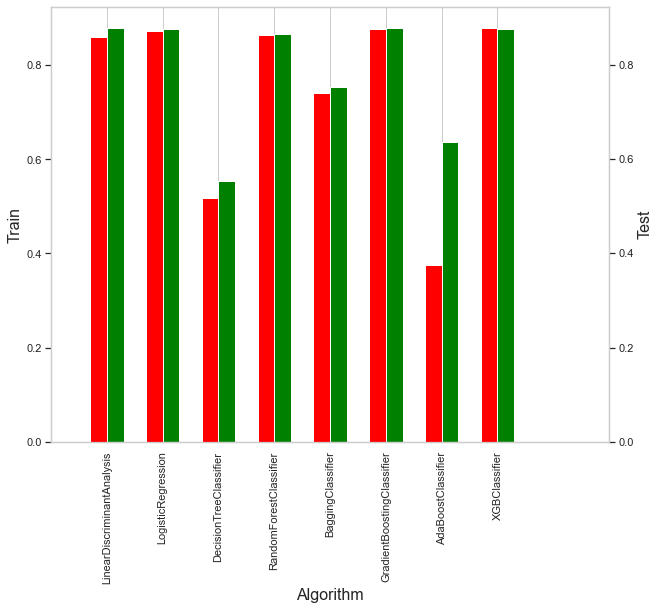

In [99]:
#classiffieurs évalués
classifiers_nli = [
    LDA(),
    LogisticRegression(class_weight=class_weight),
    DecisionTreeClassifier(class_weight=class_weight),
    RandomForestClassifier(class_weight='balanced_subsample'),
    BaggingClassifier(DecisionTreeClassifier(class_weight=class_weight)),
    GradientBoostingClassifier(),#laisser comme référence
    AdaBoostClassifier(DecisionTreeClassifier(class_weight=class_weight)),
    xgb.XGBClassifier(objective='binary:logistic',scale_pos_weight=ratio),
    ]

#Création des datasets d'apprentissages
X=Xtrain_nli
Y=ytrain
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42) 

#Préprocessing
X_train_cp=utils.ProcessData(X_train,option=True)
X_train=utils.CreateFeatures(X_train_cp,option=True)
X_test_cp=utils.ProcessData(X_test,option=True)
X_test=utils.CreateFeatures(X_test_cp,option=True)

# Baseline Roc score train set
algo = []
scores = []
for clf in classifiers_nli:
    algo.append(clf.__class__.__name__)
    pipe=Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    scores.append(cross_val_score(pipe,X_train,y_train, scoring='roc_auc',cv=5).mean())
warnings.filterwarnings('ignore')
Rocscore_train_wei = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
print(Rocscore_train_wei)

# Baseline Roc score test set
algo = []
scores = []

for clf in classifiers_nli:
    pipe=Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    pipe = pipe.fit(X_train, y_train)
    y_pred = pipe.predict_proba(X_test)[:,1]
    algo.append(clf.__class__.__name__)
    scores.append(roc_auc_score(y_test,y_pred))
warnings.filterwarnings('ignore')
Rocscore_test_wei  = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
print(Rocscore_test_wei)

# Bar plot entre train et test set
fig = plt.figure(figsize=(10,8)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = .3

Rocscore_train_wei.Score.plot(kind='bar',color='green',ax=ax,width=width, position=0, label='Train set')
Rocscore_test_wei.Score.plot(kind='bar',color='red', ax=ax2,width = width,position=1, label='Test set')

ax.grid(None, axis='y')
ax2.grid(None)

ax.set_ylabel('Train')
ax2.set_ylabel('Test')

ax.set_xlim(-1,9)
plt.show()

On constate que:
<li> la méthode ensemblistes Adaboost est impacté négativement par cette pondération des classes 
<li> la pondération a un impact positif pour xGBoost au regard du critère d'aire sous la courbe roc
<li> il n'y pas de changements notables pour les autres modèles
    
Globalement les bénéfices sont très mitigés. J'ai aussi chercher la pondération de l'attribut "class_weigth" par grid search sans obtenir de résultats significatifs. Ci dessous les résultats pour xgBoost, l'amélioration de l'aire sous la courbe se fait un peu au détriement d'autres métriques

log loss train:2.4997760071386512
roc auc train: 0.8759948081865941
balanced accuracy train:0.5
sensitivity train: 0.0
geometric train: 0.0

log loss home test:2.9246607918509353
roc auc test: 0.8782655972266247
balanced accuracy test:0.5
sensitivity test: 0.0
geometric test: 0.0
f1 test: 0.0


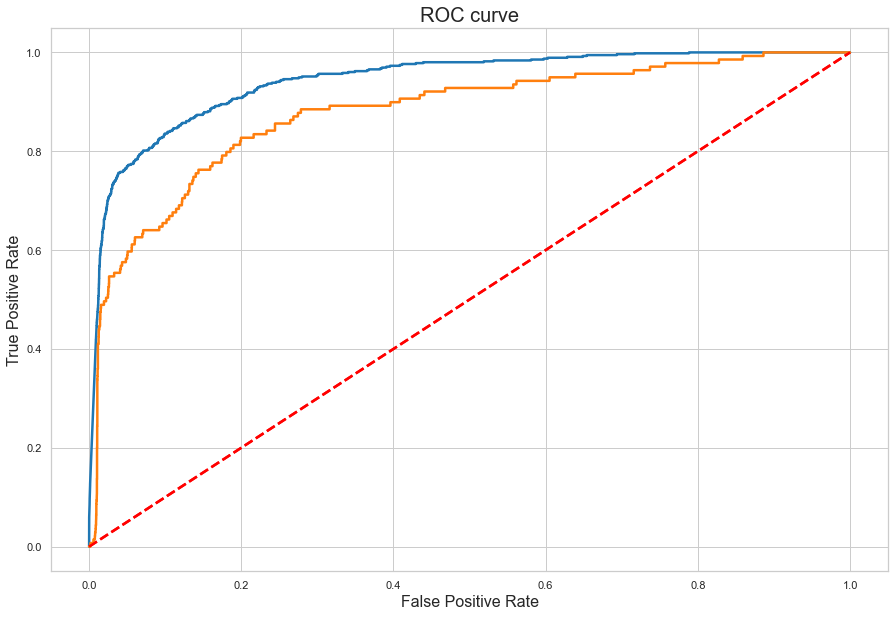

In [106]:
X=Xtrain_nli
Y=ytrain
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42)

X_train_cp=utils.ProcessData(X_train,option=True)
X_train=utils.CreateFeatures(X_train_cp,option=True)
X_test_cp=utils.ProcessData(X_test,option=True)
X_test=utils.CreateFeatures(X_test_cp,option=True)

clf=xgb.XGBClassifier(objective='binary:logistic',scale_pos_weight=ratio)


data=X_train
Y=y_train
clf.fit(data, Y.values.ravel(), )

soft=clf.predict_proba(data)[:,1]

false_pos_rate, true_pos_rate, _ = roc_curve(Y,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss train:{}'.format(utils.log_loss_home(Y,clf.predict_proba(data))))
print('roc auc train: {}'.format(cross_val_score(pipe,X_train,y_train, scoring='roc_auc',cv=5).mean()))
print('balanced accuracy train:{}'.format(balanced_accuracy_score(Y, clf.predict(data))))
print('sensitivity train: {}'.format(sensitivity_score(Y, clf.predict(X_train))))
print('geometric train: {}\n'.format(geometric_mean_score(Y, clf.predict(data))))

soft=clf.predict_proba(X_test)[:,1]
false_pos_rate, true_pos_rate, _ = roc_curve(y_test,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss home test:{}'.format(utils.log_loss_home(y_test,clf.predict_proba(X_test))))
print('roc auc test: {}'.format(roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])))
print('balanced accuracy test:{}'.format(balanced_accuracy_score(y_test, clf.predict(X_test))))
print('sensitivity test: {}'.format(sensitivity_score(y_test, clf.predict(X_test))))
print('geometric test: {}'.format(geometric_mean_score(y_test, clf.predict(X_test))))
print('f1 test: {}'.format(f1_score(y_test, clf.predict(X_test)))) 

In [ ]:

xtrain_c=Xtrain_nli
xtest_c=Xtest_nli

X=xtrain_c
Y=ytrain
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

X_train_cp=utils.ProcessData(X_train,option=True)
X_train=utils.CreateFeatures(X_train_cp,option=True)
X_test_cp=utils.ProcessData(X_test,option=True)
X_test=utils.CreateFeatures(X_test_cp,option=True)
 
data=X_train
Y=y_train

params_gene = [{'clf':[RandomForestClassifier(),
                       GradientBoostingClassifier(),
                       AdaBoostClassifier(),
                       xgb.XGBClassifier(objective='binary:logistic'),
                       LogisticRegression()],
                'PCA':[PCA(),'passthrough'],
               'selector':[SelectKBest(chi2), SelectKBest(f_classif),SelectKBest(mutual_info_classif)],
               'selector__k':[3,4,5,6,7,8,9,10,15,20,25]}
                 ]


pipe_gene= Pipeline([('scaler',StandardScaler()),('PCA','passthrough'),('selector','passthrough'),('clf', RandomForestClassifier())])


search=GridSearchCV(pipe_gene,
                  param_grid=params_gene,
                  scoring='roc_auc' ,cv= 5, refit='roc_auc_score', return_train_score=True)

search.fit(data,Y.values.ravel())
results = search.cv_results_

print(X_train.shape,y_train.shape)
clf = search.best_estimator_

clf.fit(data, Y.values.ravel(), )

soft=clf.predict_proba(data)[:,1]
false_pos_rate, true_pos_rate, _ = roc_curve(Y,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss train:{}'.format(log_loss(Y,clf.predict_proba(data))))
print('roc auc train: {}'.format(roc_auc_score(Y,soft)))
print('balanced accuracy train:{}'.format(balanced_accuracy_score(Y, clf.predict(data))))
print('sensitivity train: {}'.format(sensitivity_score(Y, clf.predict(X_train))))
print('geometric train: {}'.format(geometric_mean_score(Y, clf.predict(data))))

soft=clf.predict_proba(X_test)[:,1]
false_pos_rate, true_pos_rate, _ = roc_curve(y_test,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss test:{}'.format(log_loss(y_test,clf.predict_proba(X_test))))
print('roc auc test: {}'.format(roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])))
print('balanced accuracy test:{}'.format(balanced_accuracy_score(y_test, clf.predict(X_test))))
print('sensitivity test: {}'.format(sensitivity_score(y_test, clf.predict(X_test))))
print('geometric test: {}'.format(geometric_mean_score(y_test, clf.predict(X_test))))

## Data level strategies

Afin de s'affranchir du problème des classes déséquilibrées, il est souvent proposé de ré-échantilonner les donnéees.

Il est possible de sous échantillonner [ voir utils.Undersampling()], de sur-échantillonner [ voir utils.Oversampling()] les datasets, mais aussi d'utiliser des méthodes spécifiques, comme SMOTE, ADASYN, Tomek'links...
Le package imbalanced-learn est une librairie qui met a disposition ces méthodes de réchantillonnages mais aussi des méthodes ensemblistes qui permettent directemment de échantilloner pour chaque bootstrap.

J'ai tenté deux approches:
<li> Une première approche "maison". Elle constiste à apprendre k estimateurs sur k folds équilibrés par sous-echantillonnage. Dans chacun des k folds j'ai intégré toutes les anomalies disponibles. Ensuite je suis venu "stacker" un modèle qui avait pour données d'entrée les résultats des prédictions de ces k estimateurs. 
    
<li> la seconde approche consistait à utiliser les librairies de imbalanced-learn pour tester les méthodes ensemblistes proposées. Le fait que ces approche soient intégrées m'a permis d'utiliser le "StackingClassifier" de scikit-learn. 

### Balanced K-folds + Home Stacking Classifier

In [124]:
#Calcul de K estimators pour K folds équilibrés par undersampling
from tqdm.notebook import tqdm
#Préparation des données
X=Xtrain_nli
xtest_c=Xtest_nli
Y=ytrain
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

X_train_cp=utils.ProcessData(X_train,option=True)
X_train=utils.CreateFeatures(X_train_cp,option=True)
X_test_cp=utils.ProcessData(X_test,option=True)
X_test=utils.CreateFeatures(X_test_cp,option=True)

data=X_train
Y=y_train

# Consitution des K folds
koptimal=int(len(y_train)/np.sum(y_train==1))
kfolds=utils.CreateFolds2(data,Y,kfold=koptimal)
estimators_xGDT={}

#Recherche des K estimateurs
for k,fold in tqdm(kfolds.items()):
    print(k)
    print(fold)

    # grid Search LR
    params_xGDBT = [{'clf__n_estimators':[200,500],
              'clf__learning_rate': [0.1,0.005],
              'clf__max_depth':[1,2]}]


    pipe_xGDBT= Pipeline([('clf', GradientBoostingClassifier(random_state=42))])
    search=GridSearchCV(pipe_xGDBT,
                  param_grid=params_xGDBT,
                  scoring='roc_auc' ,cv= 5, refit=True, return_train_score=True)
    
    search.fit(data.loc[fold],Y.loc[fold].values.ravel())
    clf=search.best_estimator_
    clf.fit(data.loc[fold],Y.loc[fold].values.ravel())
    estimators_xGDT[k]=search.best_estimator_
    print('k:{}\n'.format(k))
    print('best estimator : {}'.format(search.best_estimator_))
    print('best score : {}'.format(search.best_score_))

0
[20719 15725 13300 ... 12284   165 10574]
k:0

best estimator : Pipeline(steps=[('clf',
                 GradientBoostingClassifier(max_depth=1, n_estimators=500,
                                            random_state=42))])
best score : 0.8783538083538085
1
[25997 12455  7030 ...  9033  6121  1487]
k:1

best estimator : Pipeline(steps=[('clf',
                 GradientBoostingClassifier(max_depth=2, n_estimators=200,
                                            random_state=42))])
best score : 0.882080262080262
2
[ 8363   989 21877 ... 26259 11266 15993]
k:2

best estimator : Pipeline(steps=[('clf',
                 GradientBoostingClassifier(max_depth=1, n_estimators=500,
                                            random_state=42))])
best score : 0.8871580671580672
3
[ 3753 20646  5477 ... 12180 11496 25582]
k:3

best estimator : Pipeline(steps=[('clf',
                 GradientBoostingClassifier(max_depth=1, n_estimators=500,
                                            random_st

k:31

best estimator : Pipeline(steps=[('clf',
                 GradientBoostingClassifier(max_depth=1, n_estimators=500,
                                            random_state=42))])
best score : 0.8804258804258804
32
[12967   683 18704 ...  5352 24412 19155]
k:32

best estimator : Pipeline(steps=[('clf',
                 GradientBoostingClassifier(max_depth=1, n_estimators=200,
                                            random_state=42))])
best score : 0.883931203931204
33
[26512 20703  5655 ...  2844  4951 26630]
k:33

best estimator : Pipeline(steps=[('clf',
                 GradientBoostingClassifier(max_depth=1, n_estimators=500,
                                            random_state=42))])
best score : 0.8863800163800164
34
[ 3144 11322 11366 ... 11127   794  4368]
k:34

best estimator : Pipeline(steps=[('clf',
                 GradientBoostingClassifier(learning_rate=0.005, max_depth=2,
                                            n_estimators=500,
                         

In [126]:
#choix de l'estimateur stacké maison

#Préparation des données
n=X_train.shape[0]
p=len(estimators_xGDT)
X_sec=np.zeros((n,p))
Y=y_train

#Calcul des données de sorties des estimateurs 
for k,estimator in estimators_xGDT.items():

    X_sec[:,k]=estimator.decision_function(X_train)


final_estimator = Pipeline([('lr',LogisticRegression())])
params_Stack_LR =[{'lr__penalty': ['l2'],
                  'lr__C':[1.,10.,100.]},
                 {'lr__penalty': ['l1'],
                  'lr__C':[1.,10.,100.],
                 'lr__solver':['liblinear']},
                 {'lr__penalty': ['elasticnet']}
                 
    ]

### Recherche du modèle stacké
Stack_clf=GridSearchCV(final_estimator, param_grid=params_Stack_LR, scoring='roc_auc', refit=True,cv = 5, return_train_score=True)
Stack_clf.fit(X_sec,Y.values.ravel())
results = Stack_clf.cv_results_

print('best estimator : {}'.format(Stack_clf.best_estimator_))
print('best paramters : {}'.format(Stack_clf.best_params_))
print('best score : {}'.format(Stack_clf.best_score_))
print('scorer : {}'.format(Stack_clf.scorer_))

#Refit de l'estimateur
Stack_clf_fit=Stack_clf.best_estimator_.fit(X_sec,Y.values.ravel()) 

best estimator : Pipeline(steps=[('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
best paramters : {'lr__C': 1.0, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}
best score : 0.9589712487906119
scorer : make_scorer(roc_auc_score, needs_threshold=True)


roc auc train: 0.9618814664886166
balanced accuracy train:0.6081754673054806
sensitivity train: 0.22202166064981949
roc auc test: 0.8839979884469445
balanced accuracy test:0.5868605728913802
sensitivity test: 0.17985611510791366
log loss test:0.08606396341423217
geometric test: 0.4227915601792275


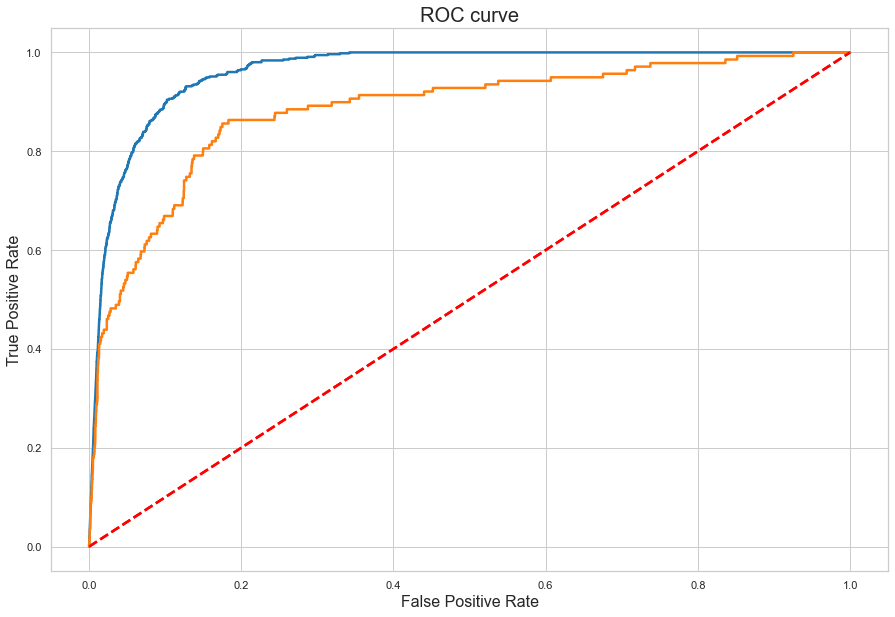

In [127]:
#Prédiction du modèle stacké
clf=Stack_clf_fit

soft=clf.predict_proba(X_sec)[:,1]
false_pos_rate, true_pos_rate, _ = roc_curve(Y,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('roc auc train: {}'.format(roc_auc_score(Y,clf.predict_proba(X_sec)[:,1])))
print('balanced accuracy train:{}'.format(balanced_accuracy_score(Y, clf.predict(X_sec))))
print('sensitivity train: {}'.format(sensitivity_score(Y, clf.predict(X_sec))))


n=X_test.shape[0]
p=len(estimators_xGDT)
X_sec=np.zeros((n,p))
Y=y_test
data=X_test
for k,estimator in estimators_xGDT.items():

    X_sec[:,k]=estimator.decision_function(data)

#Stack_clf.fit(X_sec,Y.values.ravel())

soft=clf.predict_proba(X_sec)[:,1]
false_pos_rate, true_pos_rate, _ = roc_curve(Y,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('roc auc test: {}'.format(roc_auc_score(Y,clf.predict_proba(X_sec)[:,1])))
print('balanced accuracy test:{}'.format(balanced_accuracy_score(Y, clf.predict(X_sec))))
print('sensitivity test: {}'.format(sensitivity_score(Y, clf.predict(X_sec))))
print('log loss test:{}'.format(log_loss(Y,clf.predict_proba(X_sec))))
print('geometric test: {}'.format(geometric_mean_score(Y, clf.predict(X_sec))))

Nous obtenons un modèle stacké avec une performance un peu meilleure que pour les modèles précédents. Néanmoins il ne semble pas que l'approche stackée soit très adaptée. Même si l'idée de construire plusieurs classifieurs peuvent parcourir toutes les données du dataset d'apprentissage sans être en situation de classes déséquilibrées est séduisante, les résultats laissent penser que les données dites "normales" ont peu de variance. 

### Evaluation des modèles adaptés aux données déséquilibrées "Imbalanced-learn"

                                   Score
Algorithm                               
GradientBoostingClassifier      0.875317
RUSBoostClassifier              0.784216
BalancedRandomForestClassifier  0.847090
BalancedBaggingClassifier       0.892146
BalancedBaggingClassifier       0.892015
                                   Score
Algorithm                               
GradientBoostingClassifier      0.875579
RUSBoostClassifier              0.795836
BalancedRandomForestClassifier  0.837277
BalancedBaggingClassifier       0.886254
BalancedBaggingClassifier       0.883620


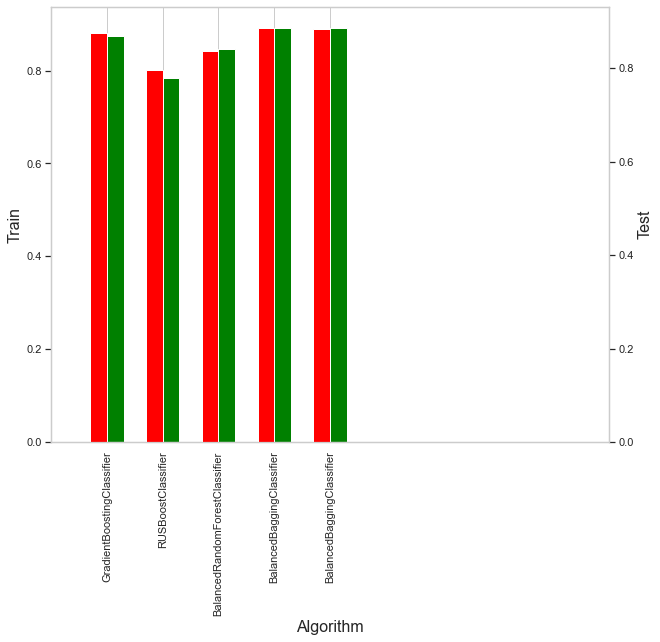

In [108]:
#Classiffieurs évalués
classifiers_nli = [
    GradientBoostingClassifier(),#reference
    RUSBoostClassifier(n_estimators=200, sampling_strategy=1.0, replacement=True),
    BalancedRandomForestClassifier(max_depth=2,n_estimators=200,class_weight='balanced_subsample'),
    BalancedBaggingClassifier(sampler=RandomUnderSampler(sampling_strategy=1.0),
                              base_estimator=GradientBoostingClassifier(),n_estimators=10),
    BalancedBaggingClassifier(sampler=SMOTEENN(sampling_strategy=1.0),base_estimator=RandomForestClassifier(),n_estimators=10)

    ]

#Création des datasets d'apprentissages
X=Xtrain_nli
Y=ytrain
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42) 

#Préprocessing
X_train_cp=utils.ProcessData(X_train,option=True)
X_train=utils.CreateFeatures(X_train_cp,option=True)
X_test_cp=utils.ProcessData(X_test,option=True)
X_test=utils.CreateFeatures(X_test_cp,option=True)

# Baseline Roc score train set
algo = []
scores = []
for clf in classifiers_nli:
    algo.append(clf.__class__.__name__)
    pipe=Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    scores.append(cross_val_score(pipe,X_train,y_train, scoring='roc_auc',cv=5).mean())
warnings.filterwarnings('ignore')
Rocscore_train_bal = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
print(Rocscore_train_bal)

# Baseline Roc score test set
algo = []
scores = []

for clf in classifiers_nli:
    pipe=Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    pipe = pipe.fit(X_train, y_train)
    y_pred = pipe.predict_proba(X_test)[:,1]
    algo.append(clf.__class__.__name__)
    scores.append(roc_auc_score(y_test,y_pred))
warnings.filterwarnings('ignore')
Rocscore_test_bal  = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
print(Rocscore_test_bal)

# Bar plot entre train et test set
fig = plt.figure(figsize=(10,8)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = .3

Rocscore_train_bal.Score.plot(kind='bar',color='green',ax=ax,width=width, position=0, label='Train set')
Rocscore_test_bal.Score.plot(kind='bar',color='red', ax=ax2,width = width,position=1, label='Test set')

ax.grid(None, axis='y')
ax2.grid(None)

ax.set_ylabel('Train')
ax2.set_ylabel('Test')

ax.set_xlim(-1,9)
plt.show()

On constate que les performances sont très légérement meilleures que celles d'un GradientBoosting. C'est d'ailleurs avec un de ces modèles que j'ai obtenu mon meilleur score jusque la. En tout cas l'idée de combiner bootstrapping et sampling me semble plus performante que de jouer sur la fonctin de loss de scikit-kearn. Ci dessous la courbe Roc de 10 estimateurs  XGB sur 10 échantillons souséchantillonnés avec la méthode "BalancedBaggingClassifier". 

log loss train:0.30610633068481397
roc auc test: 0.9540056025981235
balanced accuracy train:0.8671744769336666
sensitivity train: 0.8501805054151624
geometric train: 0.8670079459712041

log loss home test:0.4131436728122145
roc auc test: 0.8920522254811879
balanced accuracy test:0.8049990570845054
sensitivity test: 0.7338129496402878
geometric test: 0.8018453841071126
f1 test: 0.2249173098125689


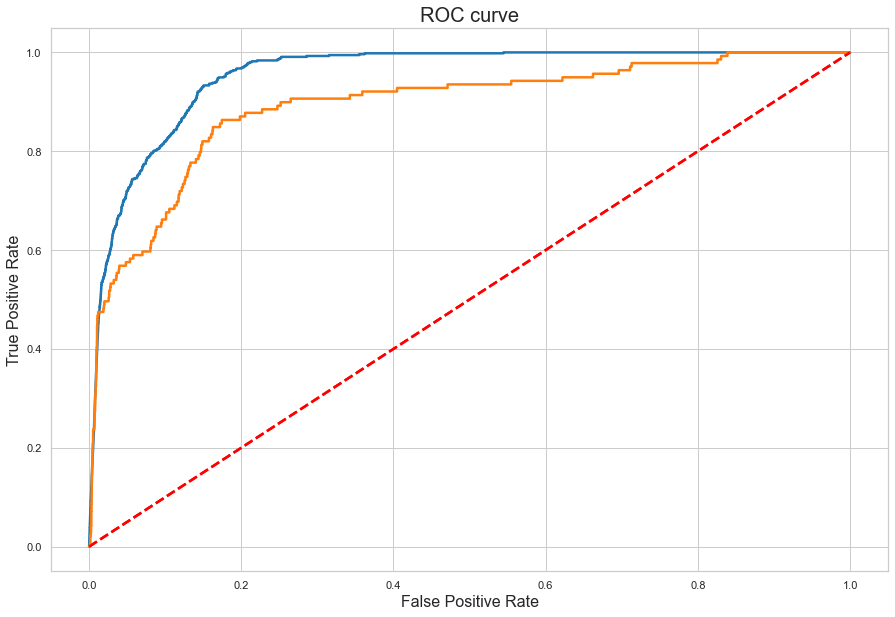

In [115]:
X=Xtrain_nli
Y=ytrain
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42)
X_train_cp=utils.ProcessData(X_train,option=True)
X_train=utils.CreateFeatures(X_train_cp,option=True)
X_test_cp=utils.ProcessData(X_test,option=True)
X_test=utils.CreateFeatures(X_test_cp,option=True)


clf = Pipeline([('clf', xgb.XGBClassifier(objective='binary:logistic',reg_lambda=10,reg_alpha=5))])
clf = BalancedBaggingClassifier(sampler=RandomUnderSampler(sampling_strategy=1.0),base_estimator=clf,n_estimators=10)

data=X_train
Y=y_train
clf.fit(data, Y.values.ravel(), )

soft=clf.predict_proba(data)[:,1]

false_pos_rate, true_pos_rate, _ = roc_curve(Y,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss train:{}'.format(utils.log_loss_home(Y,clf.predict_proba(data))))
print('roc auc test: {}'.format(roc_auc_score(Y,clf.predict_proba(data)[:,1])))
print('balanced accuracy train:{}'.format(balanced_accuracy_score(Y, clf.predict(data))))
print('sensitivity train: {}'.format(sensitivity_score(Y, clf.predict(X_train))))
print('geometric train: {}\n'.format(geometric_mean_score(Y, clf.predict(data))))

soft=clf.predict_proba(X_test)[:,1]
false_pos_rate, true_pos_rate, _ = roc_curve(y_test,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss home test:{}'.format(utils.log_loss_home(y_test,clf.predict_proba(X_test))))
print('roc auc test: {}'.format(roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])))
print('balanced accuracy test:{}'.format(balanced_accuracy_score(y_test, clf.predict(X_test))))
print('sensitivity test: {}'.format(sensitivity_score(y_test, clf.predict(X_test))))
print('geometric test: {}'.format(geometric_mean_score(y_test, clf.predict(X_test))))
print('f1 test: {}'.format(f1_score(y_test, clf.predict(X_test))))             

#### Construction d'un modèle stacké sur des modèles "Imbalanced"

Dans cette approche je construis un classiffieur sur la base de n estimateurs construits par bagging et sous echantillonages. Encore une fois l'approche stackée n'est pas plus performante pour cette problématique, tous les estimateurs semblent "capturer" les mêmes informations des données d'entrée.

log loss train:0.3724203152610276
roc auc train: 0.9530792475322089
balanced accuracy train:0.8743986369047239
sensitivity train: 0.8736462093862816
geometric train: 0.874398313169501

log loss home test:0.4131436728122145
roc auc test: 0.8920522254811879
balanced accuracy test:0.8049990570845054
sensitivity test: 0.7338129496402878
geometric test: 0.8018453841071126
f1 test: 0.2249173098125689


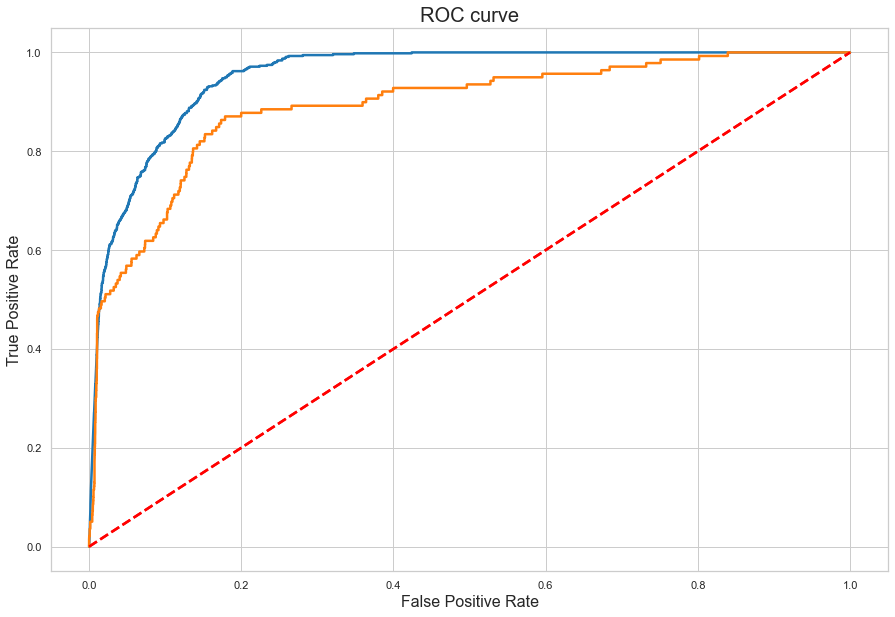

In [117]:
### Modèle stacké

#Estimateurs adaptés aux données déséquilibrées pour contruire un odèle stacké 
pipeline_LDA = Pipeline([('scaler', StandardScaler()),('feature_selection',VarianceThreshold(0.0)),('lda',LDA())])

pipeline_GBT = Pipeline([('scaler', StandardScaler()),
                         ('clf',BalancedBaggingClassifier(sampler=RandomUnderSampler(1.0),
                                                          base_estimator=GradientBoostingClassifier(learning_rate=0.005,
                                                                                                    n_estimators=500,
                                                                                                    max_depth=2,random_state=42),n_estimators=10))])

Pipeline_RF = Pipeline([('clf',BalancedBaggingClassifier(sampler=RandomUnderSampler(1.0),
                                                          base_estimator=RandomForestClassifier(max_depth=2,
                                                                                                n_estimators=1000, 
                                                                                                class_weight='balanced_subsample'),n_estimators=10))])


Pipeline_XGB = Pipeline([('clf', BalancedBaggingClassifier(base_estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                                                            reg_lambda=1.0,
                                                                                            reg_alpha=5),
                                                          sampler=RandomUnderSampler(1.0)))])

Pipeline_ADA = RUSBoostClassifier(n_estimators=500, learning_rate=1.0, algorithm='SAMME.R', sampling_strategy=1.0, replacement=True)


estimators_hybrid = [('Random Forest', Pipeline_RF),
                     ('LDA', pipeline_LDA),
                     ('Gradient Boosting', pipeline_GBT),
                     ('xgb', Pipeline_XGB),
                     ('Adaboost',Pipeline_ADA)]

#Modèle stacké
stack_LR = StackingClassifier(estimators=estimators_hybrid,
                             final_estimator=LogisticRegression(class_weight=class_weight),
                             cv = 5, stack_method='predict_proba')

xtrain_c=Xtrain_nli

xtrain_cp=utils.ProcessData(xtrain_c,option=True)
xtrain_cpf=utils.CreateFeatures(xtrain_cp,option=True)
xtest_cp=utils.ProcessData(xtest_c,option=True)
xtest_cpf=utils.CreateFeatures(xtest_cp,option=True)

X_train, X_test, y_train, y_test = train_test_split(xtrain_cpf, ytrain, test_size=0.20, stratify=ytrain, random_state=42)

Y=y_train
data=X_train


stack_LR.fit(data,Y.values.ravel())

soft=stack_LR.predict_proba(data)[:,1]

false_pos_rate, true_pos_rate, _ = roc_curve(Y,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss train:{}'.format(log_loss(Y,stack_LR.predict_proba(data))))
print('roc auc train: {}'.format(roc_auc_score(Y,soft)))
print('balanced accuracy train:{}'.format(balanced_accuracy_score(Y, stack_LR.predict(data))))
print('sensitivity train: {}'.format(sensitivity_score(Y, stack_LR.predict(data))))
print('geometric train: {}\n'.format(geometric_mean_score(Y, stack_LR.predict(data))))

soft=stack_LR.predict_proba(X_test)[:,1]
false_pos_rate, true_pos_rate, _ = roc_curve(y_test,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss home test:{}'.format(utils.log_loss_home(y_test,clf.predict_proba(X_test))))
print('roc auc test: {}'.format(roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])))
print('balanced accuracy test:{}'.format(balanced_accuracy_score(y_test, clf.predict(X_test))))
print('sensitivity test: {}'.format(sensitivity_score(y_test, clf.predict(X_test))))
print('geometric test: {}'.format(geometric_mean_score(y_test, clf.predict(X_test))))
print('f1 test: {}'.format(f1_score(y_test, clf.predict(X_test))))         

## Approche non supervisée
Ci dessous une approche avec un Isolation Forest qui apprend uniquement sur les anomalies.

roc auc :0.994654205911084
balanced accuracy train:0.018231630874111216
sensitivity train: 0.011476664116296864
geometric train: 0.01693407182076031
precision train: 0.0005261970983988574
recall train: 0.011476664116296864
roc auc test: 0.6252540376504062
balanced accuracy test:0.5055962518127394
sensitivity test: 1.0
geometric test: 0.10579462947370603
precision test: 0.005199955108301223
recall test: 1.0


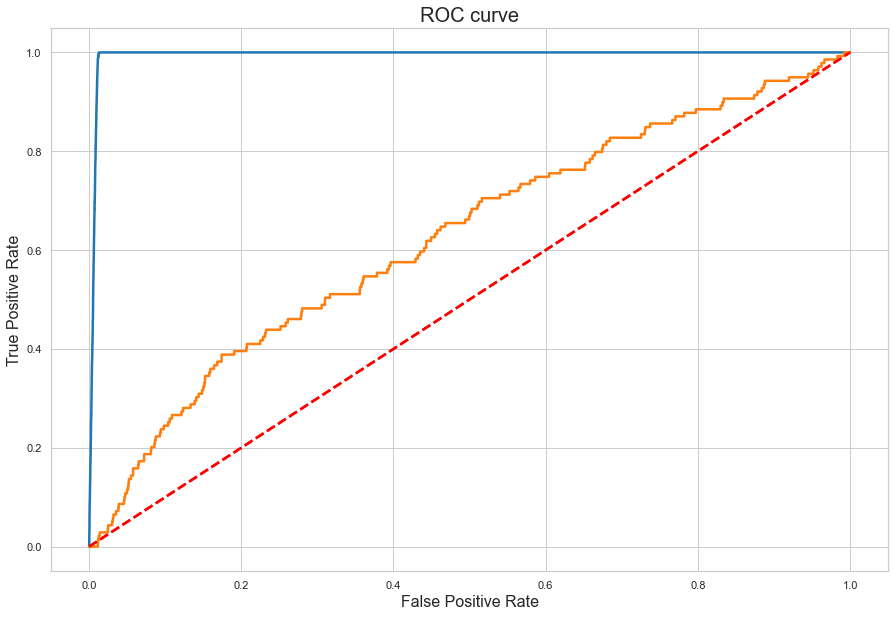

In [144]:
xtrain_c=Xtrain_lin
xtest_c=Xtest_lin

xtrain_cp=utils.ProcessData(xtrain_c,option=True)
xtrain_cpf=utils.CreateFeatures(xtrain_cp,option=True)
xtest_cp=utils.ProcessData(xtest_c,option=True)
xtest_cpf=utils.CreateFeatures(xtest_cp,option=True)

anomalies=np.where(ytrain==1)[0]
normals=np.where(ytrain==0)[0]

nb_ano_train=int(len(anomalies)*0.8)
random.shuffle(anomalies)
idx_ano_train=anomalies[:nb_ano_train]
idx_ano_train_full=np.hstack((normals,np.array(idx_ano_train)))
idx_ano_test=anomalies[nb_ano_train:]
idx_ano_test_full=np.hstack((normals,np.array(idx_ano_test)))


outliers_fraction = np.array(np.sum(ytrain==1)/len(ytrain.values.ravel()))[0]

clf = IsolationForest(n_estimators=200,contamination=outliers_fraction)

clf = Pipeline([('scaler', StandardScaler()),
                ('PCA',QuantileTransformer(n_quantiles=1000, output_distribution='normal')),
                ('rduc',KernelPCA(kernel='poly',degree=2)),
                ('clf2',clf)])

data=xtrain_cpf.loc[idx_ano_train]

clf.fit(data)

data=xtrain_cpf.loc[idx_ano_train_full]
Y=ytrain.loc[idx_ano_train_full]
soft=clf.decision_function(data)
false_pos_rate, true_pos_rate, _ = roc_curve(Y,soft)
plt.plot(false_pos_rate,true_pos_rate)

plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

res=clf.predict(data)
res[clf.predict(data)==1]=0
res[clf.predict(data)==-1]=1


print('roc auc :{}'.format(roc_auc_score(Y,clf.decision_function(data))))
print('balanced accuracy train:{}'.format(balanced_accuracy_score(Y, res)))
print('sensitivity train: {}'.format(sensitivity_score(Y, res,average='weighted')))
print('geometric train: {}'.format(geometric_mean_score(Y, res,average='weighted')))
print('precision train: {}'.format(precision_score(Y, res),average='weighted'))
print('recall train: {}'.format(recall_score(Y, res,average='weighted')))


X_test=xtrain_cpf.loc[idx_ano_test_full]
y_test=ytrain.loc[idx_ano_test_full]
res=clf.predict(X_test)
res[clf.predict(X_test)==1]=0
res[clf.predict(X_test)==-1]=1

soft=clf.decision_function(X_test)
false_pos_rate, true_pos_rate, _ = roc_curve(y_test,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)


print('roc auc test: {}'.format(roc_auc_score(y_test,clf.decision_function(X_test))))
print('balanced accuracy test:{}'.format(balanced_accuracy_score(y_test, res)))
print('sensitivity test: {}'.format(sensitivity_score(y_test, res)))
print('geometric test: {}'.format(geometric_mean_score(y_test, res)))
print('precision test: {}'.format(precision_score(y_test, res)))
print('recall test: {}'.format(recall_score(y_test, res)))


## Résultats finaux

Identifier et labelliser les données dupliquées après avoir mergé les datasets "train" et "set" permet au final d'obtenir des performances d'un très bon classifieur. 

J'utilise dans cette section des datasets d'apprentissage et de tests qui ont été mergés afin d'itentifier tous les doublons interclasses.

In [128]:
Xtrain_lin_bal =utils.CleanLin(utils.CleanData(xtrain_d))
Xtrain_nli_bal =utils.CleanData(xtrain_d)
Xtest_lin_bal =utils.CleanLin(utils.CleanData(xtest_d))
Xtest_nli_bal =utils.CleanData(xtest_d)

                               Score
Algorithm                           
LinearDiscriminantAnalysis  0.986563
LogisticRegression          0.987080
DecisionTreeClassifier      0.688815
RandomForestClassifier      0.980457
BaggingClassifier           0.968992
GradientBoostingClassifier  0.984625
AdaBoostClassifier          0.944401
XGBClassifier               0.981270
                               Score
Algorithm                           
LinearDiscriminantAnalysis  0.986876
LogisticRegression          0.985914
DecisionTreeClassifier      0.658521
RandomForestClassifier      0.980345
BaggingClassifier           0.963759
GradientBoostingClassifier  0.983518
AdaBoostClassifier          0.974068
XGBClassifier               0.980211


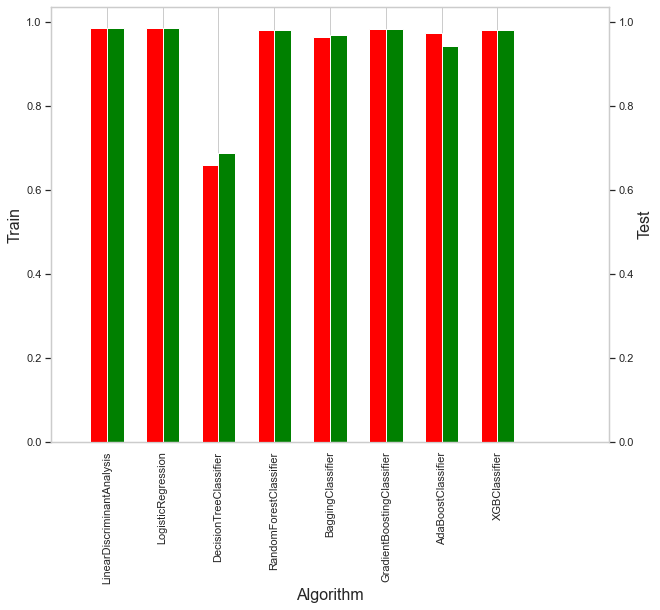

In [131]:
#classiffieurs évalués
classifiers = [
    LDA(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    BaggingClassifier(DecisionTreeClassifier()),
    GradientBoostingClassifier(),
    AdaBoostClassifier(DecisionTreeClassifier()),
    xgb.XGBClassifier(objective='binary:logistic'),
    ]

#Création des datasets d'apprentissages
X=Xtrain_nli_bal
Y=ytrain
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42) 

#Préprocessing
X_train_cp=utils.ProcessData(X_train,option=True)
X_train=utils.CreateFeatures(X_train_cp,option=True)
X_test_cp=utils.ProcessData(X_test,option=True)
X_test=utils.CreateFeatures(X_test_cp,option=True)

# Baseline Roc score train set
algo = []
scores = []
for clf in classifiers:
    algo.append(clf.__class__.__name__)
    pipe=Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    scores.append(cross_val_score(pipe,X_train,y_train, scoring='roc_auc',cv=5).mean())
warnings.filterwarnings('ignore')
Rocscore_train_bal = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
print(Rocscore_train_bal)

# Baseline Roc score test set
algo = []
scores = []

for clf in classifiers:
    pipe=Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    pipe = pipe.fit(X_train, y_train)
    y_pred = pipe.predict_proba(X_test)[:,1]
    algo.append(clf.__class__.__name__)
    scores.append(roc_auc_score(y_test,y_pred))
warnings.filterwarnings('ignore')
Rocscore_test_bal  = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
print(Rocscore_test_bal)

# Bar plot entre train et test set
fig = plt.figure(figsize=(10,8)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = .3

Rocscore_train_bal.Score.plot(kind='bar',color='green',ax=ax,width=width, position=0, label='Train set')
Rocscore_test_bal.Score.plot(kind='bar',color='red', ax=ax2,width = width,position=1, label='Test set')

ax.grid(None, axis='y')
ax2.grid(None)

ax.set_ylabel('Train')
ax2.set_ylabel('Test')

ax.set_xlim(-1,9)
plt.show()

Pratiquement tous les modèles arrivent a des excellents niveaux de prédictions. L'impact des données dupliquées sur la qualité de la prédiction êtait le facteur principal des mauvais résultats initiaux. Ci dessous se trouve le détail d'un des modèles.

log loss train:0.32796355800745397
roc auc test: 0.9936597829505026
balanced accuracy train:0.8079089797626531
sensitivity train: 0.6227436823104693
geometric train: 0.7864036700070615

log loss home test:0.3956645737908842
roc auc test: 0.9835183721399902
balanced accuracy test:0.6262149232092296
sensitivity test: 0.26618705035971224
geometric test: 0.5123719945717107
f1 test: 0.296


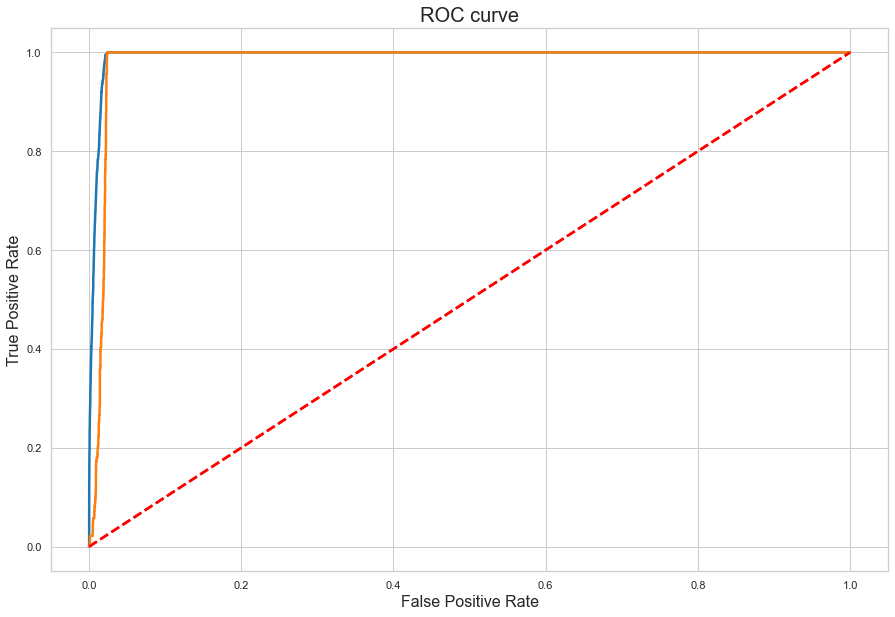

In [133]:
X=Xtrain_nli_bal
Y=ytrain
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42)
X_train_cp=utils.ProcessData(X_train,option=True)
X_train=utils.CreateFeatures(X_train_cp,option=True)
X_test_cp=utils.ProcessData(X_test,option=True)
X_test=utils.CreateFeatures(X_test_cp,option=True)


clf = Pipeline([('scaler',StandardScaler()),('clf', GradientBoostingClassifier())])

data=X_train
Y=y_train
clf.fit(data, Y.values.ravel(), )

soft=clf.predict_proba(data)[:,1]

false_pos_rate, true_pos_rate, _ = roc_curve(Y,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss train:{}'.format(utils.log_loss_home(Y,clf.predict_proba(data))))
print('roc auc test: {}'.format(roc_auc_score(Y,clf.predict_proba(data)[:,1])))
print('balanced accuracy train:{}'.format(balanced_accuracy_score(Y, clf.predict(data))))
print('sensitivity train: {}'.format(sensitivity_score(Y, clf.predict(X_train))))
print('geometric train: {}\n'.format(geometric_mean_score(Y, clf.predict(data))))

soft=clf.predict_proba(X_test)[:,1]
false_pos_rate, true_pos_rate, _ = roc_curve(y_test,soft)
plt.plot(false_pos_rate,true_pos_rate)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

print('log loss home test:{}'.format(utils.log_loss_home(y_test,clf.predict_proba(X_test))))
print('roc auc test: {}'.format(roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])))
print('balanced accuracy test:{}'.format(balanced_accuracy_score(y_test, clf.predict(X_test))))
print('sensitivity test: {}'.format(sensitivity_score(y_test, clf.predict(X_test))))
print('geometric test: {}'.format(geometric_mean_score(y_test, clf.predict(X_test))))
print('f1 test: {}'.format(f1_score(y_test, clf.predict(X_test))))             